# **Semestr√°lny projekt ‚Äì Jednotn√© programovacie dru≈æstvo**

## √övodn√© importy a defin√≠cie

In [ ]:
import pandas as pd
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas

Ako √∫lo≈æisko vyu≈æit√Ωch datasetov sme sa rozhodli vyu≈æi≈• Google Drive. Pri naƒç√≠tan√≠ d√°t z Disku v≈°ak doch√°dza k ƒçast√©mu probl√©mu, keƒè link na zdieƒæanie s√∫boru nie je spr√°vne naƒç√≠tan√Ω pou≈æit√≠m met√≥dy ```pandas.read_csv()```. Z tohto d√¥vodu bola zadefinovan√° met√≥da na √∫pravu problematick√©ho linku tak, aby pou≈æitie met√≥dy ```pandas.read_csv()``` bolo bezprobl√©mov√©.





In [ ]:
! mkdir img

mkdir: cannot create directory ‚Äòimg‚Äô: File exists


In [ ]:
def download_link(url):
  '''Met√≥da na √∫pravu share linku z Google Drive'''
  return 'https://drive.google.com/uc?id=' + url.split('/')[-2]

Funkcia na r√Ωchle vykresƒæovanie grafov s okresmi Slovenska, tak√©to grafy vykresƒæujeme ƒçasto.

In [ ]:
# podklady na vizualiz√°ciu m√°p podƒæa okresov Slovenska
url = "https://bbrejova.github.io/viz/data/districts.json"
districts_bounds = geopandas.read_file(url)

def map_plot(data: pd.Series, title: str=None, log: bool=False, **kwargs):
  """
  Funkcia `map_plot` - vykresl√≠ mapu Slovenska podƒæa okresov.
  `data: pd.Series` - ak√© ƒç√≠sla sa maj√∫ do mapy zobrazi≈•
  `title: str=None` - n√°zov grafu
  `log: bool=False` - ƒçi sa maj√∫ d√°ta v Series data zlogaritmova≈• pred vykreslen√≠m
  `kwargs` - ostatn√© parametre, ktor√© sa po≈°l√∫ do plotovacej funkcie, predvolene
             to s√∫: cmap="Blues", figsize=(11,5), edgecolor="black"
  """
  districts_table = districts_bounds.copy() # type: geopandas.GeoDataFrame
  districts_table.set_index("IDN3")
  districts_table["new"] = np.log(data).to_list() if log else data.to_list() # creating new column
  # update arguments of plot method from kwargs
  kwargs = {"cmap": 'Blues', "figsize": (11,5), "edgecolor": "black"} | kwargs
  districts_table.plot(column="new", **kwargs)
  plt.axis("off") # unimportant axes
  if plt.title is not None:
    plt.title(title)

## Z√°kladn√© inform√°cie

Ako prv√© s√∫ ustanoven√© z√°kladn√© atrib√∫ty ≈°tatistick√©ho s√∫boru. V prvom rade uv√°dzame ≈°trukt√∫ru obyvateƒæstva Slovenskej republiky z hƒæadiska pohlav√≠ a n√°sledne aj veku. Definujme aj vekov√© rozmedzia socioekonomick√Ωch skup√≠n, ktor√© s√∫ v reporte vyu≈æ√≠van√©:

*   **Predprodukt√≠vni** ‚Äì vek 0-14 rokov
*   **Produkt√≠vni** ‚Äì vek 15-64 rokov
*   **Postprodukt√≠vni** ‚Äì vek 65+ rokov



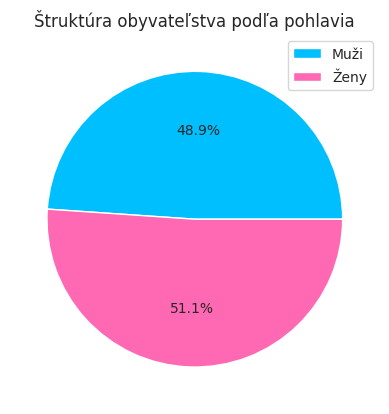

<Figure size 2500x1000 with 0 Axes>

In [ ]:
# ≈†trukt√∫ra obyvateƒæstva podƒæa veku a pohlavia
sns.set_style("whitegrid")
fig, axes = plt.subplots()

plt.figure(figsize=(25, 10))

axes.pie([2665376, 2783894], autopct='%1.1f%%', colors=["deepskyblue","hotpink"])
axes.set_title("≈†trukt√∫ra obyvateƒæstva podƒæa pohlavia")
axes.legend(["Mu≈æi", "≈Ωeny"])

'''
axes[1].set_visible(False)

axes[2].pie([867410, 3652679, 929181],
            startangle=270, autopct='%1.1f%%', radius=2)
axes[2].set_title("≈†trukt√∫ra obyvateƒæstva podƒæa veku", pad=60)
axes[2].legend(["Predprodukt√≠vni", "Produkt√≠vni", "Postprodukt√≠vni"])
'''
fig.savefig('img/obr01.pdf')
plt.show()
pass

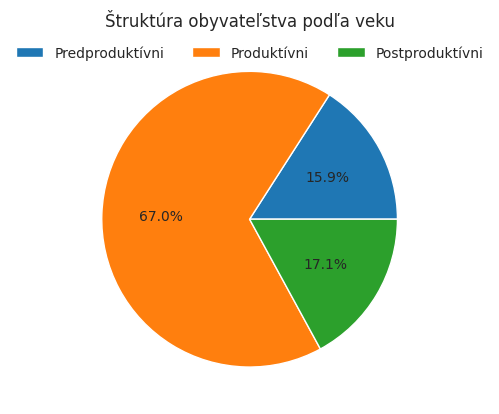

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots()

#plt.figure(figsize=(25, 20))

axes.pie([867410, 3652679, 929181], autopct='%1.1f%%')
axes.set_title("≈†trukt√∫ra obyvateƒæstva podƒæa veku")
axes.legend(["Predprodukt√≠vni", "Produkt√≠vni", "Postprodukt√≠vni"], loc='center',frameon=False,bbox_to_anchor=(.5, 0.95),ncol=3)
fig.savefig('img/obr02.pdf')
plt.show()
pass

I napriek tomu, ≈æe vo vizualiz√°cii vy≈°≈°ie uv√°dzame aj vekov√∫ skupinu do 15 rokov, v ƒèal≈°√≠ch anal√Ωzach vzdelanosti nebude t√°to skupina bran√° do √∫vahy, nakoƒæko jej kontrib√∫cia k absol√∫tnej poƒçetnosti vysoko≈°kolsky vzdelanej, resp. popul√°cie s najvy≈°≈°√≠m maturitn√Ωm vzdelan√≠m, je nulov√°.

Za pomoci datasetu, ktor√© je voƒæne dostupn√Ω ako v√Ωstup Sƒç√≠tania obyvateƒæov, domov a bytov 2021, dok√°≈æeme vizualizova≈• aj rozlo≈æenie obyvateƒæstva medzi jednotliv√Ωmi samospr√°vnymi krajmi SR.

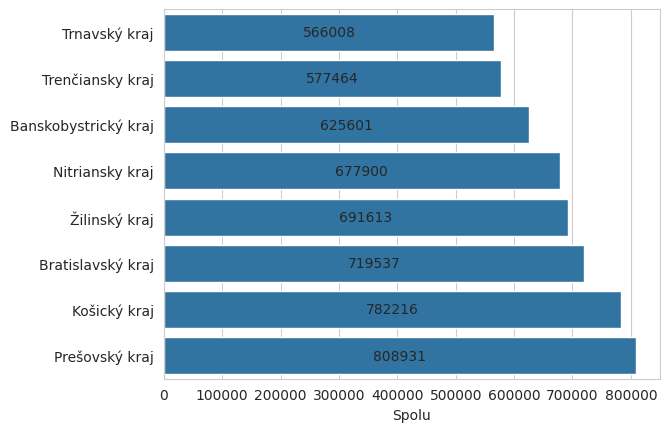

In [ ]:
# ≈†trukt√∫ra obyvateƒæstva podƒæa jednotliv√Ωch samospr√°vnych krajov SR
data = pd.read_csv(download_link("https://drive.google.com/file/d/1WefJGmasFT3syFEhwgQJ-M0p4OGnALfJ/view?usp=sharing"))
data = data.sort_values("Spolu")
plot = sns.barplot(data=data, x="Spolu", y="√özemn√° jednotka")
plot.set_ylabel(None)
plot = plot.bar_label(plot.containers[0], label_type="center")
plt.show()

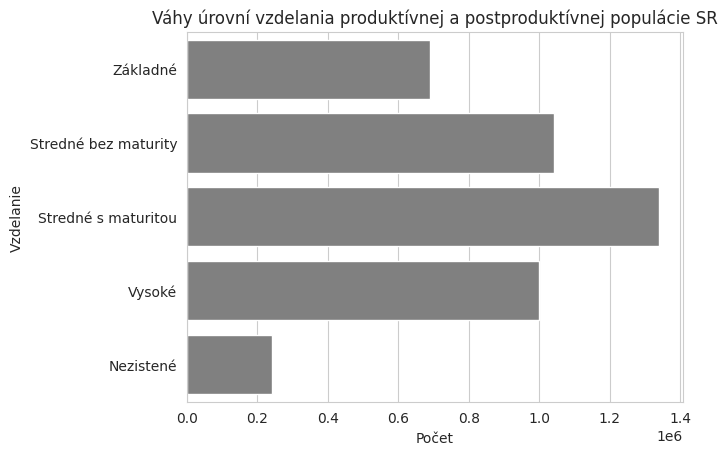

In [ ]:
vzdelanie_okresy_pohlavie=pd.read_csv(download_link("https://drive.google.com/file/d/1cbMyjPqjhvWomauQhQDFLWuezxZZdzxJ/view?usp=sharing"), sep=";")
dospeli=vzdelanie_okresy_pohlavie[vzdelanie_okresy_pohlavie['Ekonomick√© vekov√© skupiny'].str.contains("pred")==False]
maturita_only=dospeli[dospeli['Vzdelanie'].str.contains("s maturitou")]
zs_only=dospeli[dospeli["Vzdelanie"].str.contains("z√°kladn√©")]
stredne_bez_maturity=dospeli[dospeli['Vzdelanie'].str.contains("stredn√© odborn√©")]
vysokoskolske=dospeli[dospeli["Vzdelanie"].str.contains("vysoko")]
ine=dospeli[dospeli["Vzdelanie"].str.contains("vy≈°≈°ie|vysoko|s maturitou|z√°kladn√©|stredn√© odborn√©")==False]
najvyssie_ukoncene_skupiny=["Z√°kladn√©", "Stredn√© bez maturity", "Stredn√© s maturitou", "Vysok√©","Nezisten√©"]
najvyssie_ukoncene_pocet=[sum(zs_only["abs."]),sum(stredne_bez_maturity["abs."]),sum(maturita_only["abs."]),sum(vysokoskolske["abs."]),sum(ine["abs."])]
najvyssie_ukoncene_df=pd.DataFrame({"Vzdelanie":najvyssie_ukoncene_skupiny,"Poƒçet":najvyssie_ukoncene_pocet})
#display(vzdelanie_okresy_pohlavie)
plot2 = sns.barplot(x="Poƒçet", y="Vzdelanie", data=najvyssie_ukoncene_df,color="gray").set_title("V√°hy √∫rovn√≠ vzdelania produkt√≠vnej a postprodukt√≠vnej popul√°cie SR")
plt.show()
# Label k barplotu

Z vizualiz√°cie je evidentn√©, ≈æe v popul√°cii SR nad 15 rokov maj√∫ najv√§ƒç≈°iu v√°hu t√≠ so stredo≈°kolsk√Ωm vzdelan√≠m s maturitnou sk√∫≈°ku *(pribli≈æne 1.3 mili√≥na)*. Necel√Ω mili√≥n zas popul√°cia s ukonƒçen√Ωm aspo≈à prv√Ωm stup≈àom vysokej ≈°koly, v tesnom z√°vese popul√°cie stredo≈°kolskom bez maturity. Pribli≈æne necel√Ωch 700-tis√≠c obyvateƒæov SR m√° najvy≈°≈°ie z√°kladn√© vzdelanie. Pribli≈æne 230-tis√≠c obyvateƒæov pri evidencii sƒç√≠tania neuviedlo svoje najvy≈°≈°ie ukonƒçen√© vzdelanie, resp. bli≈æ≈°ie ho ne≈°pecifikovalo.

### Najvy≈°≈°ie dosiahnut√© vzdelanie podƒæa pohlavia

In [ ]:
vzdelanie_vek = pd.read_csv(download_link("https://drive.google.com/file/d/1nLGWtVLPVi53oi_C0sbBWUWE8M3vcjCF/view?usp=sharing"), sep=";")
vzdelanie_vek['Vek'].replace({'90 a viac rokov': '90+'}, inplace=True) # for truer plot
neziaci = vzdelanie_vek[vzdelanie_vek['S√∫ƒçasn√° ekonomick√° aktivita'].str.contains("die≈•a|≈°tudent|≈æiak|nezisten√©") == False].query('Vek >= "18"')
zakladne = neziaci.query('Vzdelanie.str.contains("z√°kladn√©")')
stredne = neziaci.query('Vzdelanie.str.contains("stredn√©|vy≈°≈°ie")')
vysoke = neziaci.query('Vzdelanie.str.contains("vysoko≈°kolsk√©")')
bez = neziaci.query('Vzdelanie.str.contains("bez ≈°kolsk√©ho vzdelania")')

pohlavie_zakladne = zakladne.groupby('Pohlavie')['abs.'].sum()
pohlavie_stredne = stredne.groupby('Pohlavie')['abs.'].sum()
pohlavie_vysoke = vysoke.groupby('Pohlavie')['abs.'].sum()
pohlavie_bez = bez.groupby('Pohlavie')['abs.'].sum()

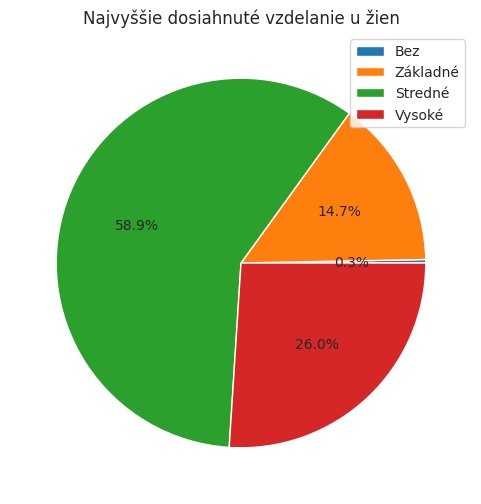

In [ ]:
plt.figure(figsize=(6,6))
plt.pie([pohlavie_bez['≈æena'], pohlavie_zakladne['≈æena'], pohlavie_stredne['≈æena'], pohlavie_vysoke['≈æena']], autopct='%1.1f%%')
plt.legend(['Bez', 'Z√°kladn√©', 'Stredn√©', 'Vysok√©'])
plt.title(label="Najvy≈°≈°ie dosiahnut√© vzdelanie u ≈æien")
plt.savefig('img/obr06.pdf')
plt.show()

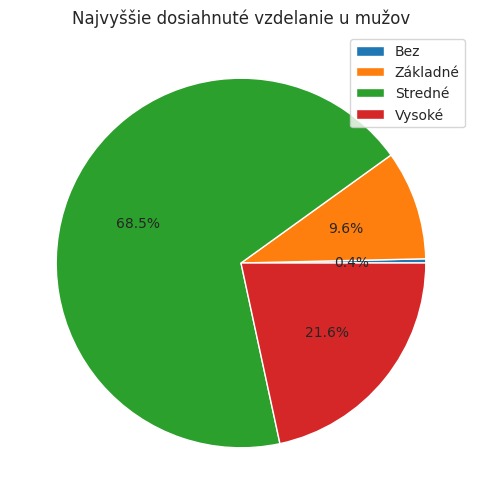

In [ ]:
plt.figure(figsize=(6,6))
plt.pie([pohlavie_bez['mu≈æ'], pohlavie_zakladne['mu≈æ'], pohlavie_stredne['mu≈æ'], pohlavie_vysoke['mu≈æ']], autopct='%1.1f%%')
plt.legend(['Bez', 'Z√°kladn√©', 'Stredn√©', 'Vysok√©'])
plt.title(label="Najvy≈°≈°ie dosiahnut√© vzdelanie u mu≈æov")
plt.savefig('img/obr07.pdf')
plt.show()

## Vidiek vs mesto
Na √∫zem√≠ Slovenskej republiky sa nach√°dza 2927 obc√≠, z toho 141 m√° ≈°tat√∫t mesta. D√¥le≈æit√Ωm ukazovateƒæom miery vzdelania je pr√≠padn√Ω rozdiel medzi mierou vzdelania obyvateƒæstva vidieka a miest.

In [ ]:
## ZOZNAM SLOVENSK√ùCH MIEST PODƒΩA WIKI
table = pd.read_html('https://sk.wikipedia.org/wiki/Zoznam_miest_na_Slovensku')[0]
mesta = table.iloc[:,2]
mesta = list(mesta)

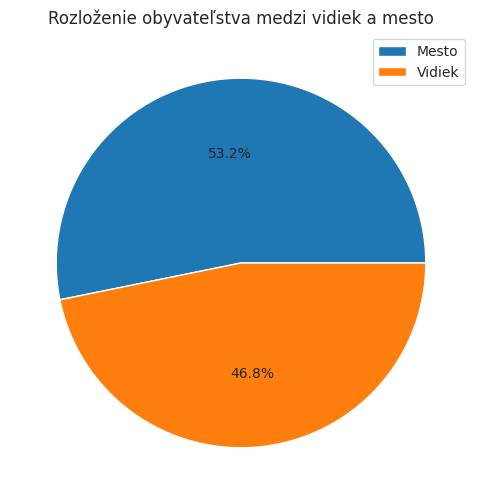

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie([2898474, 2550796], autopct='%1.1f%%')
#plt.pie([2898474, 2550796], labels=["Mesto", "Vidiek"], autopct='%1.1f%%')
plt.title("Rozlo≈æenie obyvateƒæstva medzi vidiek a mesto")
plt.legend(["Mesto", "Vidiek"])
plt.savefig('img/obr05.pdf')
plt.show()


Z d√°t je jasn√©, ≈æe v miernej v√§ƒç≈°ine je obyvateƒæstvo v mest√°ch, ktor√© predstavuje 53.2% a zvy≈°n√Ωch 46.8% predstavuje obyvateƒæstvo na vidieku.

## Nezamestnanos≈•

Zist√≠me percentu√°lny podiel nezamestnan√Ωch celkovo na Slovensku a aj v jednotliv√Ωch okresoch a vykresl√≠me na porovnanie s in√Ωmi mapkami (najm√§ podiel vysoko≈°kolsky vzdelan√©ho obyvateƒæstva a obyvateƒæstva s maturitn√Ωm vzdelan√≠m)

In [ ]:
# z√°kladn√© √∫daje o popul√°cii v jednotliv√Ωch okresoch Slovenska
okresy_populacie = pd.read_csv(download_link("https://drive.google.com/file/d/1JCD86DVe-IYimbNe44tlMzOBnkrQ7cWa/view?usp=sharing"))

# veƒæk√° tabuƒæka s dimenziami: pohlavie, vek (1 roƒçn√© skupiny), vzdelanie,
# s√∫ƒçasn√° ekonomick√° aktivita
vek_ekon_okresy = pd.read_csv(download_link("https://drive.google.com/file/d/1Ul4DOa69jUFFDbV8wneLZdm1d8beaDSM/view?usp=sharing"), sep=';')

# √∫prava stƒ∫pca s vekom potrebn√° pre ƒèal≈°ie anal√Ωzy
vek_ekon_okresy['Vek'] = vek_ekon_okresy['Vek'].apply(lambda vek: int(vek.split()[0]))
nepredproduktivni_vek_ekon = vek_ekon_okresy.query("Vek > 14")

In [ ]:
nezamestnani = vek_ekon_okresy.query("`S√∫ƒçasn√° ekonomick√° aktivita`=='nezamestnan√Ω'")
nezamestnani = nezamestnani.set_index(["N√°zov okresu", "Pohlavie"])
pocty = nezamestnani.groupby("N√°zov okresu")["abs."].sum()
percenta_nezamestnani = okresy_populacie.set_index("√özemn√° jednotka").sort_values(by="√özemn√° jednotka")["Spolu"]
percenta_nezamestnani = round(100*pocty/percenta_nezamestnani, 3)

# s√∫hrnn√° ≈°tatistika poƒçtu nezamestnan√Ωch
vsetci = vek_ekon_okresy['abs.'].sum()
nepredproduktivni = nepredproduktivni_vek_ekon['abs.'].sum()
display(Markdown(
    "Nezamestnan√Ωch je {} obyvateƒæov, ƒço tvor√≠ {} % popul√°cie, alebo {} %, ak vynech√°me predprodukt√≠vnu popul√°ciu."
                 .format(nezamestnani['abs.'].sum(),
                         round(100*nezamestnani['abs.'].sum()/vsetci, 3),
                         round(100*nezamestnani['abs.'].sum()/nepredproduktivni, 3))
))

Nezamestnan√Ωch je 230392 obyvateƒæov, ƒço tvor√≠ 4.228 % popul√°cie, alebo 5.028 %, ak vynech√°me predprodukt√≠vnu popul√°ciu.

In [ ]:
display(Markdown("**Okresy s najni≈æ≈°ou nezamestnanos≈•ou (%)**"))
display(percenta_nezamestnani.sort_values().head())
display(Markdown("**Okresy s najvy≈°≈°ou nezamestnanos≈•ou (%)**"))
display(percenta_nezamestnani.sort_values(ascending=False).head(15))
# vyp√≠san√© okresy sa m√¥≈æu pou≈æi≈• v reporte

**Okresy s najni≈æ≈°ou nezamestnanos≈•ou (%)**

N√°zov okresu
Okres Bratislava I      1.895
Okres Hlohovec          2.254
Okres Trenƒç√≠n           2.284
Okres Nitra             2.330
Okres Bratislava III    2.363
dtype: float64

**Okresy s najvy≈°≈°ou nezamestnanos≈•ou (%)**

N√°zov okresu
Okres Rimavsk√° Sobota      10.489
Okres Rev√∫ca               10.484
Okres Ro≈æ≈àava               8.953
Okres Ke≈æmarok              8.786
Okres Vranov nad Topƒæou     8.273
Okres Medzilaborce          8.177
Okres Polt√°r                8.069
Okres Sobrance              8.053
Okres Svidn√≠k               8.032
Okres Trebi≈°ov              7.710
Okres Stropkov              7.647
Okres Sabinov               7.506
Okres Bardejov              7.332
Okres Michalovce            6.770
Okres Luƒçenec               6.712
dtype: float64

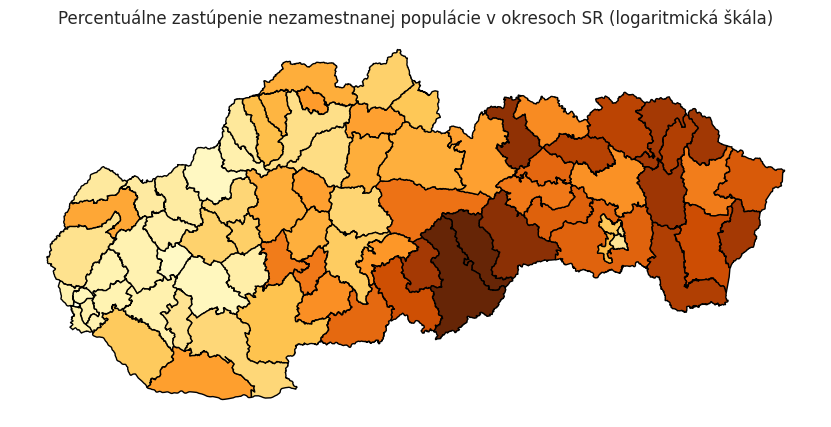

In [ ]:
title = "Percentu√°lne zast√∫penie nezamestnanej popul√°cie v okresoch SR (logaritmick√° ≈°k√°la)"
map_plot(percenta_nezamestnani, title=title, log=True, legend=False, cmap='YlOrBr')
plt.savefig('img/obr08.pdf')
plt.show()
pass

V mape je evidentn√Ω markantn√Ω rozdiel medzi regi√≥nmi z√°padn√©ho a v√Ωchodn√©ho, resp. ƒçasti stredn√©ho Slovenska. Okresy najm√§ Gemeru (okresy Polt√°r, Rimavsk√° Sobota a Rev√∫ca) alebo okres Ke≈æmarok trpia vysokou mierou nezamestnanosti. Komparat√≠vne je vy≈°≈°ia √∫rove≈à nezamestnanosti v regi√≥noch v√Ωchodnej≈°√≠ch ako z√°padnej≈°√≠ch.

V demografick√Ωch pozorovaniach sa ust√°lil pojem tzv. **hladovej doliny** pre vyƒçlenen√© √∫zemia s mierou nezamestnanosti nad 20%. D√¥vodov, preƒço do≈°lo k tak√©mu n√°rastu miery nezamestnanosti je mnoho, pri t√Ωchto regi√≥noch m√¥≈æeme bra≈• do √∫vahy napr√≠klad odchody veƒæk√Ωch, najm√§ priemyseln√Ωch, zamestn√°vateƒæov z okresu, ktor√≠ to mo≈æno p√¥sobili doned√°vna alebo nedostatoƒçn√Ω pr√≠stup obyvateƒæstva k vzdelaniu, ktor√© by potenci√°lni zamestn√°vatelia po≈æadovali ‚Äì s t√Ωm mo≈æno hypotetizova≈• aj o neatraktivite regi√≥nu pre vstup veƒæk√Ωch zamestn√°vateƒæov.

### S√∫vislos≈• so vzdelan√≠m

V nasleduj√∫cej ƒçasti presk√∫mame, ƒçi a ako s√∫vis√≠ nezamestnanos≈• s najvy≈°≈°√≠m dosiahnut√Ωm vzdelan√≠m.

In [ ]:
nezam_tab = pd.DataFrame()
nezam_tab['vsetci'] = nepredproduktivni_vek_ekon.groupby("Vzdelanie")['abs.'].sum()
nezamestnani_vek_ekon = nepredproduktivni_vek_ekon.query("`S√∫ƒçasn√° ekonomick√° aktivita`=='nezamestnan√Ω'")
nezam_tab['nezamestnani'] = nezamestnani_vek_ekon.groupby("Vzdelanie")['abs.'].sum()
nezam_tab['percenta'] = nezam_tab['nezamestnani'] / nezam_tab['vsetci']
nezam_tab['percenta'] = nezam_tab['percenta'].apply(lambda x: 100 * round(x, 5))
nezam_tab.sort_values(by='percenta', inplace=True, ascending=False)
display(nezam_tab)

vsetci  nezamestnani  \
Vzdelanie                                                                  
vy≈°≈°ie odborn√© vzdelanie (bli≈æ≈°ie neuveden√©)            43            41   
z√°kladn√© vzdelanie (bli≈æ≈°ie neuveden√©)                7951          4867   
stredn√© odborn√© (uƒç≈àovsk√©) vzdelanie bez maturi...    6809          3894   
bez ≈°kolsk√©ho vzdelania ‚Äì osoby vo veku 15 roko...   13930          1450   
z√°kladn√© vzdelanie - 1. stupe≈à z√°kladnej ≈°koly      107009         11017   
z√°kladn√© vzdelanie - 2. stupe≈à z√°kladnej ≈°koly      574608         43228   
stredn√© odborn√© (uƒç≈àovsk√©) vzdelanie bez maturi...   89879          6288   
stredn√© odborn√© (uƒç≈àovsk√©) vzdelanie bez maturi...  834806         47497   
stredn√© odborn√© (uƒç≈àovsk√©) vzdelanie bez maturi...  112002          6178   
√∫pln√© stredn√© vzdelanie s maturitou odborn√© (uƒç...  300968         16481   
√∫pln√© stredn√© vzdelanie s maturitou odborn√©         772142         38444   
vy≈°≈°ie odborn√© vzdelanie nadstavbov√© (maturita ...  187782          9130   
√∫pln√© stredn√© vzdelanie s maturitou v≈°eobecn√©       264747         11051   
vysoko≈°kolsk√© vzdelanie - 1. stupe≈à (Bc.)           141312          4971   
vysoko≈°kolsk√© vzdelanie (bli≈æ≈°ie neuveden√©)            423            14   
vy≈°≈°ie odborn√© vzdelanie pomaturitn√© (pomaturit...   42748          1375   
vysoko≈°kolsk√© vzdelanie - 2. stupe≈à (Ing.; Mgr....  801308         22276   
vy≈°≈°ie odborn√© vzdelanie vy≈°≈°ie odborn√© (absolv...   36638           966   
d√¥vern√©                                              13392           305   
vysoko≈°kolsk√© vzdelanie - 3. stupe≈à (PhD.; a i.)     56396           892   
√∫pln√© stredn√© vzdelanie s maturitou (bli≈æ≈°ie ne...    3120             2   
nezisten√©                                           213847            25   

                                                    percenta  
Vzdelanie                                                     
vy≈°≈°ie odborn√© vzdelanie (bli≈æ≈°ie neuveden√©)          95.349  
z√°kladn√© vzdelanie (bli≈æ≈°ie neuveden√©)                61.212  
stredn√© odborn√© (uƒç≈àovsk√©) vzdelanie bez maturi...    57.189  
bez ≈°kolsk√©ho vzdelania ‚Äì osoby vo veku 15 roko...    10.409  
z√°kladn√© vzdelanie - 1. stupe≈à z√°kladnej ≈°koly        10.295  
z√°kladn√© vzdelanie - 2. stupe≈à z√°kladnej ≈°koly         7.523  
stredn√© odborn√© (uƒç≈àovsk√©) vzdelanie bez maturi...     6.996  
stredn√© odborn√© (uƒç≈àovsk√©) vzdelanie bez maturi...     5.690  
stredn√© odborn√© (uƒç≈àovsk√©) vzdelanie bez maturi...     5.516  
√∫pln√© stredn√© vzdelanie s maturitou odborn√© (uƒç...     5.476  
√∫pln√© stredn√© vzdelanie s maturitou odborn√©            4.979  
vy≈°≈°ie odborn√© vzdelanie nadstavbov√© (maturita ...     4.862  
√∫pln√© stredn√© vzdelanie s maturitou v≈°eobecn√©          4.174  
vysoko≈°kolsk√© vzdelanie - 1. stupe≈à (Bc.)              3.518  
vysoko≈°kolsk√© vzdelanie (bli≈æ≈°ie neuveden√©)            3.310  
vy≈°≈°ie odborn√© vzdelanie pomaturitn√© (pomaturit...     3.217  
vysoko≈°kolsk√© vzdelanie - 2. stupe≈à (Ing.; Mgr....     2.780  
vy≈°≈°ie odborn√© vzdelanie vy≈°≈°ie odborn√© (absolv...     2.637  
d√¥vern√©                                                2.277  
vysoko≈°kolsk√© vzdelanie - 3. stupe≈à (PhD.; a i.)       1.582  
√∫pln√© stredn√© vzdelanie s maturitou (bli≈æ≈°ie ne...     0.064  
nezisten√©                                              0.012

Vid√≠me, ≈æe stƒ∫pce so vzdelan√≠m "nezisten√©" a "(bli≈æ≈°ie neuveden√©)" s√∫ jednoznaƒçn√≠ outlieri, pr√≠padne dokonca ≈°tatistick√© chyby, maj√∫ aj oveƒæa men≈°ie absol√∫tne poƒçty, preto sa m√¥≈æu v grafe vynecha≈• (v texte reportu sa m√¥≈æu spomen√∫≈• a vysvetli≈• situ√°cia).

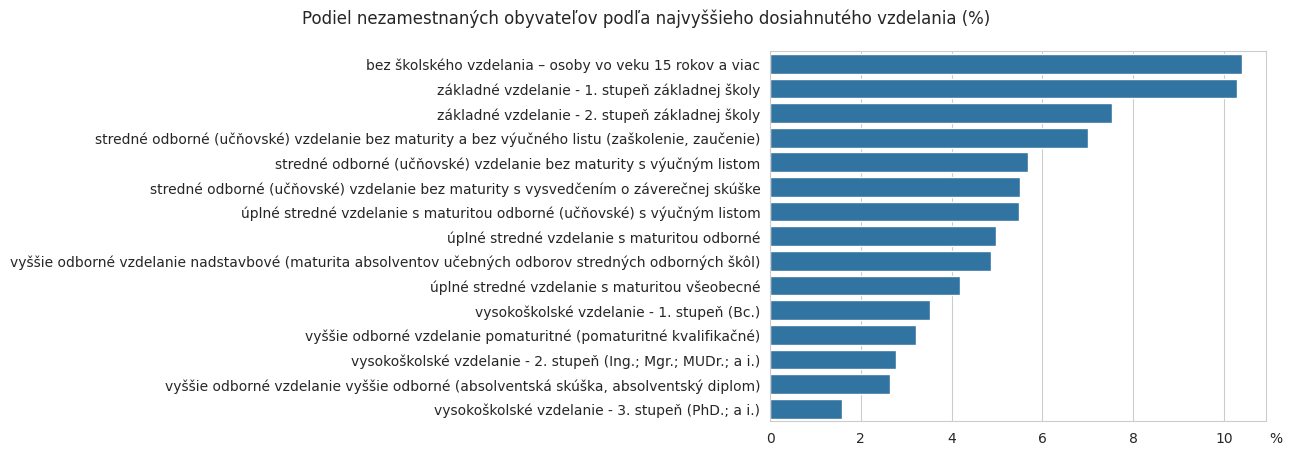

In [ ]:
nezam_plottab = nezam_tab.query('(index.str.contains("bli≈æ≈°ie")) == False ' +
                                '& index != "nezisten√©" & index != "d√¥vern√©"')
ax = sns.barplot(data=nezam_plottab['percenta'], x=None,
                   y=None, orient='h')
ax.set_xlabel(None)
ax.set_ylabel(None)
title = "Podiel nezamestnan√Ωch obyvateƒæov podƒæa najvy≈°≈°ieho dosiahnut√©ho vzdelania (%)"
ax.set_title(title, x=-0.25, pad=20)
ax.text(11, 15.35, "%")
plt.savefig('img/obr09.pdf')
plt.show()
pass

Z tohto grafu mo≈æno vyvodi≈•, ≈æe skupiny obyvateƒæov s vy≈°≈°√≠m vzdelan√≠m maj√∫ men≈°√≠ percentu√°lny podiel nezamestnan√Ωch, ne≈æ obyvatelia s ni≈æ≈°√≠m vzdelan√≠m alebo √∫plne bez vzdelania. Poradie v tabuƒæke podielov nezamestnan√Ωch celkom presne kore≈°ponduje s dƒ∫≈ækou potrebn√©ho ≈°t√∫dia, pr√≠padne jeho n√°roƒçnos≈•ou. Neprekvap√≠ fakt, ≈æe jasne najvy≈°≈°√≠ podiel nezamestnanosti maj√∫ skupiny obyvateƒæov bez ≈°kolsk√©ho vzdelania a s absolvovan√Ωm 1. stup≈àom Z≈† a najni≈æ≈°√≠ podiel nezamestnan√Ωch je medzi obyvateƒæmi s vedeckou kvalifik√°ciou (s titulmi PhD., CSc., doc., prof., ...)

Za pov≈°imnutie stoj√≠ lep≈°ia zamestnanos≈• absolventov *vy≈°≈°ieho pomaturitn√©ho odborn√©ho vzdelania* ne≈æ absolventov *bakal√°rskeho ≈°t√∫dia* a aj lep≈°ia zamestnanos≈• absolventov *pomaturitn√©ho ≈°t√∫dia s absolut√≥riom (absolventsk√° sk√∫≈°ka, absolventsk√Ω diplom)* ne≈æ absolventov *druh√©ho stup≈àa vysoko≈°kolsk√©ho ≈°t√∫dia*.

### Vtip do prezent√°cie?

Treba si obƒças aj trochu zasrandova≈•... üòÉ
* Isto hej - Jakub
*  Velice s√∫hlas√≠m ‚Äì Marek






In [ ]:
# ak padaj√∫ ƒèal≈°ie framy na chybe ≈æe nie je latex, tak treba spusti≈• tento k√≥d (staƒç√≠ raz za session)
# ! sudo apt-get update
# ! sudo apt-get install texlive-latex-recommended
# ! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
# ! wget http://mirrors.ctan.org/macros/latex/...
# ! unzip type1cm.zip -d /tmp/type1cm
# ! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
# ! sudo mkdir /usr/share/texmf/tex/latex/type1cm
# ! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
# ! sudo texhash
# ! apt install cm-super

In [ ]:
# matfyz_nezam = nezam_plottab.copy(deep=True)
# matfyz_nezam.loc['vzdelanie na Fakulte matematiky, fyziky a informatiky UK'] = [None, None, -1.047] # -pi/3
# pass

In [ ]:
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = "Computer Modern Roman"
#ax = sns.barplot(data=matfyz_nezam['percenta'], x=None, y=None, orient='h')
#ax.set_xlabel("\% nezamestnan√Ωch")
#ax.set_ylabel(None)
#title = "Podiel nezamestnan√Ωch obyvateƒæov podƒæa najvy≈°≈°ieho dosiahnut√©ho vzdelania (\%)"
#ax.set_title(title, x=-0.25, pad=20)
#ax.text(-1.3, 16.3, r"$-\frac{\pi}{3}$")
#pass

In [ ]:
# vypne LaTeX a fancy font
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = "sans-serif"

## Vysoko≈°kolsk√© vzdelanie

#### Podiely v okresoch
V prvom rade sa zaober√°me podielom vysoko≈°kolsky vzdelanej popul√°cie v okresoch SR. Tieto zistenia vizualizujeme na mape.

In [ ]:
# OKRES/POHLAVIE/VEK/NAJVY≈†≈†IE VZDELANIE -> https://drive.google.com/file/d/1cbMyjPqjhvWomauQhQDFLWuezxZZdzxJ/view?usp=sharing
okresy_populacie2 = pd.read_csv(download_link("https://drive.google.com/file/d/1cbMyjPqjhvWomauQhQDFLWuezxZZdzxJ/view?usp=sharing"),sep=";")

#okresy_populacie = pd.read_csv(download_link("https://drive.google.com/file/d/1JCD86DVe-IYimbNe44tlMzOBnkrQ7cWa/view?usp=sharing"))
#vysoka_skola = vzdelanie_okresy_pohlavie.query(vs_query_prompts)
vysoka_skola = vzdelanie_okresy_pohlavie.query('Vzdelanie.str.contains("vysoko≈°kolsk√©")')
vysoka_skola = vysoka_skola.set_index(["N√°zov okresu", "Pohlavie"])
#Poƒçty/Podiely vysoko≈°kolsky vzdelan√Ωch (ak√Ωkoƒævek stupe≈à) podƒæa okresov
pocty = vysoka_skola.groupby("N√°zov okresu")["abs."].sum()
vsetci = okresy_populacie.set_index("√özemn√° jednotka").sort_values(by="√özemn√° jednotka")["Spolu"]
percenta_vysokoskolakov = round(100*pocty/vsetci, 3)

nad_15 = (okresy_populacie2.set_index("N√°zov okresu").sort_values(by="N√°zov okresu").query(
    '`Ekonomick√© vekov√© skupiny`.str.contains("15|65")').groupby("N√°zov okresu")["abs."].sum())
percenta_vysokoskolakov2 = round(100*pocty/nad_15, 3)

#Poƒçty vysoko≈°kolsky vzdelan√Ωch (ak√Ωkoƒævek stupe≈à) podƒæa pohlavia
pohlavia = vysoka_skola.groupby("Pohlavie")["abs."].sum()
# Viacej vysoko≈°kolsky vzdelan√Ωch je ≈æien

### Mapa
Mapov√° vizualiz√°cia ni≈æ≈°ie prezentuje v logaritmickej ≈°k√°le percentu√°lny podiel vysoko≈°kolsky vzdelanej popul√°cie naprieƒç okresmi SR. Za pov≈°imnutie stoja tmav≈°ie oblasti v≈°etk√Ωch √¥smich krajsk√Ωch miest, konkr√©tnej≈°ie aj najv√§ƒç≈°ie extr√©my v aglomer√°cii Ko≈°√≠c a Bratislavy. Opaƒçn√Ωm extr√©mom s√∫ napr√≠klad okresy v tzv. hladov√Ωch dolin√°ch. Na mape vieme pozorova≈• napr√≠klad regi√≥n Gemeru ‚Äì okresy Polt√°r, Rev√∫ca a Rimavsk√° Sobota alebo okres Gelnica. Zauj√≠mav√Ωm pozorovan√≠m je to, ≈æe severov√Ωchodn√© hladov√© doliny netrpia komparat√≠vne tak√Ωm nedostatkom vysoko≈°kolsky vzdelanej popul√°cie, ako napr. Gemer.

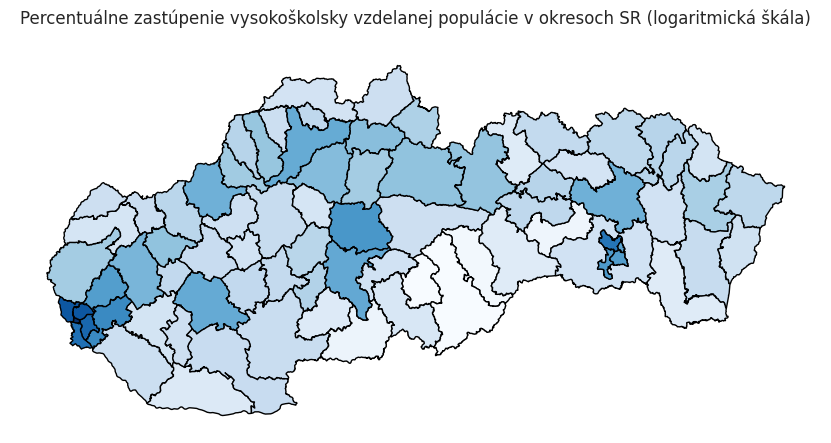

In [ ]:
title = "Percentu√°lne zast√∫penie vysoko≈°kolsky vzdelanej popul√°cie v okresoch SR (logaritmick√° ≈°k√°la)"
map_plot(percenta_vysokoskolakov2, title=title, log=True)
plt.savefig('img/obr14.pdf')
plt.show()
pass

### Vek

Zanalyzujeme, ak√° je poƒçetnos≈• vysoko≈°kolsky vzdelanej popul√°cie podƒæa veku a ak√Ω podiel tvor√≠ v jednotliv√Ωch vekov√Ωch roƒçn√≠koch vysoko≈°kolsky vzdelan√° popul√°cia.

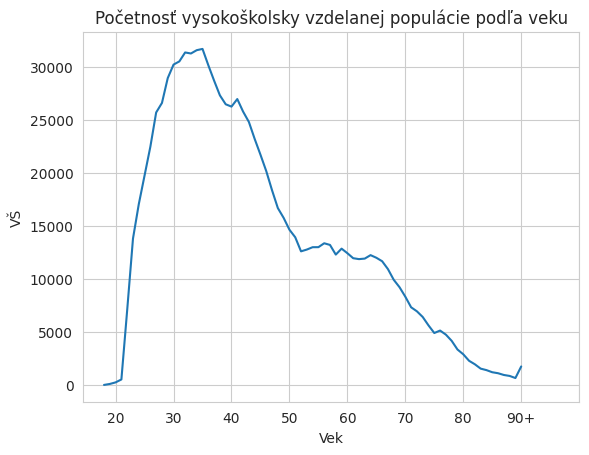

In [ ]:
all_vs = vzdelanie_vek.query("Vzdelanie.str.contains('vysoko≈°kolsk√©')").iloc[:,[3, 6]].groupby("Vek").sum()
all = vzdelanie_vek.set_index("Vek").loc[all_vs.index,["abs."]].groupby("Vek").sum()
vs_ratio = all_vs['abs.'] / all['abs.']
vs_vek = pd.DataFrame({'V≈†': all_vs['abs.'],
                   'Vek_int': range(18, 91),
                   'V≈°etci': all['abs.'],
                   '%': 100 * vs_ratio, })
vs_vek = vs_vek.reset_index()
plot = sns.lineplot(data=vs_vek, x="Vek", y="V≈†")
plot.set_title("Poƒçetnos≈• vysoko≈°kolsky vzdelanej popul√°cie podƒæa veku")
plot.set_xticks(range(2, 91, 10))
plt.show()
pass

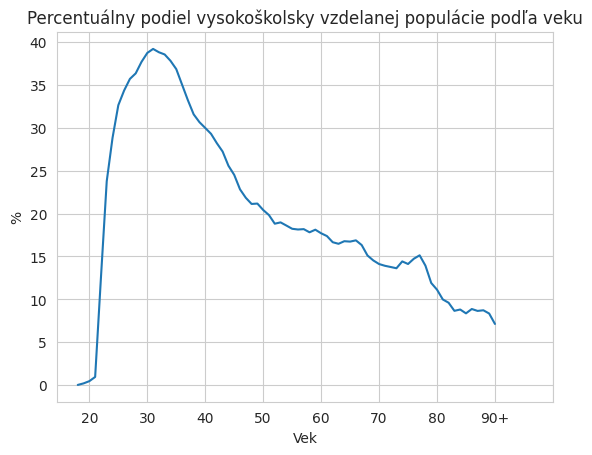

In [ ]:
plot = sns.lineplot(data=vs_vek.sort_values(by='Vek_int'), x="Vek", y="%")
plot.set_title("Percentu√°lny podiel vysoko≈°kolsky vzdelanej popul√°cie podƒæa veku")
plot.set_xticks(range(2, 91, 10))
plt.savefig('img/obr10.pdf')
plt.show()
pass

V tomto grafe vid√≠me jasn√Ω rast podielu vysoko≈°kolsky vzdelanej popul√°cie od star≈°√≠ch vekov√Ωch roƒçn√≠kov smerom k mlad≈°√≠m. Ak sa pozrieme na posledn√Ω graf podrobnej≈°ie, vid√≠me, ≈æe podiel ner√°stol pre cel√∫ vzorku rovnakou r√Ωchlos≈•ou. A≈æ na men≈°ie odch√Ωlky r√°stol line√°rne od najstar≈°√≠ch roƒçn√≠kov a≈æ po roƒçn√≠k, ktor√Ω mal v ƒçase sƒç√≠tania okolo 50 rokov. Podiel mlad≈°√≠ch roƒçn√≠kov rastie smerom k 30-roƒçn√Ωm tie≈æ line√°rne, ale v√Ωrazne viac ako pre star≈°ie roƒçn√≠ky.

Roƒçn√≠ky, ktor√© mali v ƒçase sƒç√≠tania okolo 50 rokov konƒçili stredn√© ≈°koly pribli≈æne v ƒçase Ne≈ænej revol√∫cie (2021 - 50 + 18 = 1989). M√¥≈æeme teda predpoklada≈•, ≈æe p√°d re≈æimu otvoril v√§ƒç≈°iemu spektru ƒæud√≠ mo≈ænos≈• ≈°tudova≈• na vysokej ≈°kole a obyvatelia SR t√∫to mo≈ænos≈• aj vyu≈æili. V 90-tych rokoch do≈°lo aj ku vzniku nov√Ωch vysok√Ωch ≈°k√¥l ƒçi univerz√≠t, pr√≠padne k zv√§ƒç≈°eniu kapacity  u≈æ existuj√∫cich ako odpoveƒè na zv√Ω≈°en√Ω poƒçet z√°ujemcov o ≈°t√∫dium. T√∫to zmenu politickej situ√°cie na Slovensku √∫daje v√Ωrazne reflektuj√∫.

Ak by sme chceli e≈°te viac hypotetizova≈•, m√¥≈æeme sa pozrie≈• na zauj√≠mav√∫ odch√Ωlku z line√°rneho rastu pri obyvateƒæoch s vekom medzi 75 a 79 rokmi. Ak sa pozrieme, kedy konƒçili stredn√© ≈°koly, zist√≠me, ≈æe to bolo v priebehu 60-tych rokov 20. storoƒçia, ƒço kore≈°ponduje s ƒçasom politick√©ho uvoƒænenia pred Pra≈æskou jarou. M√¥≈æeme vyslovi≈• hypot√©zu, ≈æe politick√© uvoƒænenie v 60-tych rokoch podporilo viac obyvateƒæov √≠s≈• ≈°tudova≈• na vysok√∫ ≈°kolu. Mierny pokles po pr√°ve op√≠sanom uvoƒænen√≠ m√¥≈æeme prip√≠sa≈• siln√©mu normalizaƒçn√©mu procesu, ktor√Ω nasledoval po roku 1968. Vyvolal mas√≠vnu vlnu emigr√°cie do zahraniƒçia a vieme poveda≈•, ≈æe veƒæk√Ω podiel emigrantov boli pr√°ve ≈°tudenti na vysok√Ωch ≈°kol√°ch, pr√≠padne ich absolventi. Poƒças normaliz√°cie do≈°lo aj k spr√≠sneniu podmienok pre ≈°t√∫dium na vysok√Ωch ≈°kol√°ch a vyhadzovaniu politicky nepohodln√Ωch ≈°tudentov, ktor√≠ zaƒçali ≈°tudova≈• vysok√∫ ≈°kolu v ƒçase pred augustom 1968.

In [ ]:
# lineploty na vizualiz√°ciu historick√Ωch skutoƒçnost√≠, mo≈æno sa z√≠du
vs_vek['Rok narodenia'] = 2021 - vs_vek.Vek_int
vs_vek['Rok dov≈ï≈°enia 18 rokov'] = 2021 - vs_vek.Vek_int + 18
vs_vek.sort_values(by='Rok narodenia', inplace=True)

figure, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)
sns.lineplot(data=vs_vek, x="Rok narodenia", y='%', ax=axes[0])
sns.lineplot(data=vs_vek, x="Rok dov≈ï≈°enia 18 rokov", y='%', ax=axes[1])
plt.show()

pass

### Pohlavie (a vek)
Vo vizualiz√°cii ni≈æ≈°ie dok√°≈æeme nahliadnu≈•, ≈æe na Slovensku prevahu v popul√°ci√≠, ktor√° je vysoko≈°kolsky vzdelan√°, maj√∫ (56.6%) ≈æeny, zatiaƒæ ƒço mu≈æi predstavuj√∫ zvy≈°n√Ωch 43.4%. Pozrime sa aj bli≈æ≈°ie na to, ako je rozlo≈æen√° vysoko≈°kolsky vzdelan√° popul√°cia podƒæa veku a pohlavia.

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(vysoka_skola.groupby("Pohlavie")["abs."].sum(), autopct='%1.1f%%',colors=["deepskyblue","hotpink"])
plt.title("Zlo≈æenie vysoko≈°kolsky vzdelanej popul√°cie podƒæa pohlavia")
plt.legend(["Mu≈æi", "≈Ωeny"])
plt.savefig('img/obr11.pdf')
plt.show()
pass

In [ ]:
vzdelanie_vek = pd.read_csv(download_link("https://drive.google.com/file/d/1nLGWtVLPVi53oi_C0sbBWUWE8M3vcjCF/view?usp=sharing"), sep=";")
male = vzdelanie_vek.query("Pohlavie == 'mu≈æ'")
female = vzdelanie_vek.query("Pohlavie == '≈æena'")
men = male.query("Vzdelanie.str.contains('vysoko≈°kolsk√©')").iloc[:,[3, 6]].set_index("Vek").groupby("Vek").sum()
women = female.query("Vzdelanie.str.contains('vysoko≈°kolsk√©')").iloc[:,[3, 6]].set_index("Vek").groupby("Vek").sum()
men_all = male.set_index("Vek").loc[men.index,["abs."]].groupby("Vek").sum()
women_all = female.set_index("Vek").loc[women.index,["abs."]].groupby("Vek").sum()
data = {"Vek":range(18, 91), "Mu≈æi":men["abs."],"≈Ωeny":women["abs."]}
df = pd.DataFrame(data)

melted_df = pd.melt(df, id_vars='Vek', var_name='Pohlavie')
melted_df.rename(columns={"value":"Poƒçetnos≈•"}, inplace=True)
plot = sns.lineplot(data=melted_df, x="Vek", y="Poƒçetnos≈•", hue="Pohlavie",palette={"≈Ωeny":"hotpink","Mu≈æi":"deepskyblue"})
plot.set_title("Poƒçetnos≈• vysoko≈°kolsky vzdelan√Ωch ≈æien a mu≈æov")
plot = plot.grid(False)
plt.show()
pass

V tejto vizualiz√°ci√≠ je vidie≈• to, ≈æe vo v√§ƒç≈°ine vekov√Ωch skup√≠n, vysoko≈°kolsky vzdelanej popul√°cie, maj√∫ prevahu ≈æeny. Obrat a prevahu mu≈æskej popul√°cie je mo≈æn√© pozorova≈• pribli≈æne vo vekovej skupine nad 60 rokov, ƒçomu zodpoved√° rok narodenia poƒçiatkom 60. rokov 20. storoƒçia. Zauj√≠mav√Ωm pozorovan√≠m je aj to, ≈æe prevaha ≈æenskej popul√°cie v rozmedz√≠ veku 20 a≈æ 50 je niekoƒæko n√°sobne vy≈°≈°ia ako t√°, ktor√∫ m√° mu≈æsk√° popul√°cia pri veku nad 60 rokov. M√¥≈æeme sa teda hypoteticky domnieva≈•, ≈æe pribli≈æne v obdob√≠ v rozmedz√≠ 70. a≈æ 80. rokov 20. storoƒçia zaƒçal omnoho viacej narasta≈• z√°ujem ≈æien o vysoko≈°kolsk√© ≈°t√∫dium, ktor√© bolo evidentne sk√¥r vyrovnan√© s men≈°ou majoritou mu≈æov. Tento trend narastal a≈æ do poƒçiatku 20. storoƒçia a evidentne pretrv√°va a≈æ dodnes. Ako mo≈æno zisti≈• zo zdroja [1], s√∫ƒçasn√Ω podiel ≈æien na vysok√Ωch ≈°kol√°ch je okolo 59%.

Ak sa pozrieme na absol√∫tnu poƒçetnos≈• v≈°etk√Ωch mu≈æov a ≈æien, nielen vysoko≈°kolsky vzdelan√Ωch, zist√≠me, ≈æe vo vy≈°≈°√≠ch roƒçn√≠koch je ≈æien podstatne viac:

*Pozn√°mka: skok pri najvy≈°≈°om veku je sp√¥soben√Ω t√Ωm, ≈æe v d√°tach m√°me jeden √∫daj pre v≈°etk√Ωch obyvateƒæov s vekom 90 a viac. (do fin√°lnych grafov usekneme tento posledn√Ω √∫daj?)*

#### ≈Ωeny vs mu≈æi percentu√°lne vekovo

In [ ]:
vsetci = men + women
muzi_per = men / vsetci
zeny_per = women / vsetci
data = {"Vek":range(18, 91), "Mu≈æi":muzi_per["abs."],"≈Ωeny":zeny_per["abs."]}
df = pd.DataFrame(data)
melted_df = pd.melt(df, id_vars='Vek', var_name='Pohlavie')
melted_df.rename(columns={"value":"Poƒçetnos≈•"}, inplace=True)
plot = sns.lineplot(data=melted_df, x="Vek", y="Poƒçetnos≈•", hue="Pohlavie",palette={"≈Ωeny":"hotpink","Mu≈æi":"deepskyblue"})
plot.set_title("Percentu√°lne zast√∫penie vysoko≈°kolsky vzdelan√Ωch ≈æien a mu≈æov")
plot = plot.grid(False)
plt.show()

In [ ]:
df_abs = pd.DataFrame(
    {'Vek': list(map(str, range(18, 91))),
     'Mu≈æi': men_all['abs.'],
     '≈Ωeny': women_all['abs.']}
    )
melted_df_abs = pd.melt(df_abs, id_vars='Vek', var_name='Pohlavie')
melted_df_abs.rename(columns={"value":"Poƒçetnos≈•"}, inplace=True)
melted_df_abs['Vek'].replace({'90': '90+'}, inplace=True)
plot = sns.lineplot(data=melted_df_abs, x='Vek', y='Poƒçetnos≈•', hue='Pohlavie',
                    palette={"≈Ωeny":"hotpink","Mu≈æi":"deepskyblue"})
plot.set_title("Absol√∫tna poƒçetnos≈• mu≈æov a ≈æien podƒæa veku")
plot.set_xticks(range(2, 91, 10))
plt.savefig('img/obr03.pdf')
plt.show()
pass

Kv√¥li t√Ωmto nerovnak√Ωm hodnot√°m bude zauj√≠mav√© pozrie≈• sa aj na percentu√°lny podiel vysoko≈°kolsky vzdelanej popul√°cie podƒæa veku a pohlavia.

In [ ]:
df_rel = pd.DataFrame(
    {'Vek': list(map(str, range(18, 91))),
     'Mu≈æi': 100 * men['abs.'] / men_all['abs.'],
     '≈Ωeny': 100 * women['abs.'] / women_all['abs.']}
    )
melted_df_rel = pd.melt(df_rel, id_vars='Vek', var_name='Pohlavie')
melted_df_rel.rename(columns={"value":"Podiel"}, inplace=True)
melted_df_rel['Vek'].replace({'90': '90+'}, inplace=True)
plot = sns.lineplot(data=melted_df_rel, x='Vek', y='Podiel', hue='Pohlavie',
    palette={"≈Ωeny":"hotpink","Mu≈æi":"deepskyblue"})
plot.set_ylabel("%")
plot.set_title("Percentu√°lny podiel vysoko≈°kolsky vzdelan√Ωch mu≈æov a ≈æien podƒæa veku")
plot.set_xticks(range(2, 91, 10))
plt.savefig('img/obr12.pdf')
plt.show()
pass

Tu vid√≠me pre ni≈æ≈°ie veky v z√°sade rovnak√Ω graf ako pri absol√∫tnej poƒçetnosti vysoko≈°kolsky vzdelan√Ωch ≈æien a mu≈æov, a≈æ do veku 60 rokov. Nad tento vek sa v≈°ak graf z√°sadne men√≠.

 Vid√≠me, ≈æe podiel vysoko≈°kolsky vzdelan√Ωch ≈æien sa od najstar≈°√≠ch obyvateƒæov k mlad≈°√≠m rovnomerne zvy≈°uje, miera rastu sa v√Ωraznej≈°ie zv√Ω≈°i pri veku 50. Tento fakt by nepotvrdzoval hypot√©zu vysloven√∫ vy≈°≈°ie, ≈æe v 70. a 80. rokoch 20. storoƒçia zaƒçal prudko narasta≈• z√°ujem ≈æien o vysoko≈°kolsk√© vzdelanie, ale sk√¥r, ≈æe u≈æ od 40. a≈æ 50. rokov, kam siaha na≈°a vzorka (a najstar≈°√≠ obyvatelia Slovenska) z√°ujem ≈æien o vy≈°≈°ie vzdelanie st√∫pal.

Podiel vysoko≈°kolsky vzdelan√Ωch mu≈æov je pribli≈æne kon≈°tantn√Ω pre mu≈æov s vekom viac ako 50 rokov. Od veku 50 smerom k men≈°√≠m vekom tento podiel zaƒçal st√∫pa≈•.

Ako bolo vy≈°≈°ie zmienen√©, medzn√≠k, ktor√Ω tvoria 50-roƒçn√≠ obyvatelia pravdepodobne kore≈°ponduje s p√°dom komunizmu. Na grafoch podƒæa pohlavie takisto vidie≈• pre obidve pohlavia men≈°√≠, ale n√°padn√Ω n√°rast podielu vysoko≈°kolsky vzdelan√Ωch obyvateƒæov vo vekoch 75 - 78 rokov, o ktorom sme vyslovili hypot√©zu, ≈æe m√¥≈æe by≈• sp√¥soben√Ω politick√Ωm uvoƒænen√≠m a n√°slednou normaliz√°ciou v 60-tych rokoch minul√©ho storoƒçia. [2]

### Podiely v samospr√°vnych krajoch
 V druhom rade sa zaober√°me podielom vysoko≈°kolsky vzdelanej popul√°cie v jednotliv√Ωch samospr√°vnych krajoch SR. Tieto zistenia vizualizujeme v barplote.

In [ ]:
vzdelanie_kraje_pohlavie = pd.read_csv(download_link("https://drive.google.com/file/d/13iZyo-H6Z1Iec9VqTp-NV_3qShMCyS6g/view?usp=sharing"), sep=";")
kraje_populacie = pd.read_csv(download_link("https://drive.google.com/file/d/1_WSt9B7IMAB-EuGaf__FaEmxalnm0fOs/view?usp=sharing"))
vysoka_skola_kraje = vzdelanie_kraje_pohlavie.query('Vzdelanie.str.contains("vysoko≈°kolsk√©")')
pocty_kraje_univerzita = vysoka_skola_kraje.groupby("N√°zov kraja")["abs."].sum()

vsetci_kraje = kraje_populacie.set_index("√özemn√° jednotka").sort_values(by="√özemn√° jednotka")["Spolu"]
nad_15_kraje = (vzdelanie_kraje_pohlavie.set_index("N√°zov kraja").query(
    '`Ekonomick√© vekov√© skupiny`.str.contains("15|65")').groupby("N√°zov kraja")["abs."].sum())

percenta_vysokoskolakov_kraje1 = round(100*pocty_kraje_univerzita/vsetci_kraje, 3)
percenta_vysokoskolakov_kraje2 = round(100*pocty_kraje_univerzita/nad_15_kraje, 3)
# Bratislava je ako≈æe in√Ω √∫let, ostatn√© s√∫ viac menej veƒæmi podobn√©

kraje_populacie = kraje_populacie.set_index("√özemn√° jednotka").sort_values(by="√özemn√° jednotka")
kraje_populacie["Percento V≈†1"] = list(percenta_vysokoskolakov_kraje1)
kraje_populacie["Percento V≈†2"] = list(percenta_vysokoskolakov_kraje2)
kraje_populacie["Nad 15"] = list(nad_15_kraje)


#print(percenta_vysokoskolakov_kraje2.mean()) -> 21.714125
#print(percenta_vysokoskolakov_kraje2.median()) -> 19.356
# Veƒæmi podobn√Ω medi√°n aj aritmetick√Ω priemer

In [ ]:
figure, axes = plt.subplots(2,sharex=True)
plot = sns.barplot(data=kraje_populacie.sort_values(by="Percento V≈†1", ascending=False),
                   x="Percento V≈†1", y="√özemn√° jednotka",ax=axes[0])
plot.set_title("Percentu√°lny podiel vysoko≈°kolsky vzdelanej popul√°cie v krajoch SR")
plot.bar_label(plot.containers[0], label_type="center")


plot2 = sns.barplot(data=kraje_populacie.sort_values(by="Percento V≈†2", ascending=False),
                    x="Percento V≈†2", y="√özemn√° jednotka",ax=axes[1])
plot2.bar_label(plot2.containers[0], label_type="center")
plt.show()
pass

Zauj√≠mav√Ωm pozorovan√≠m je t√° skutoƒçnos≈•, ≈æe celkov√Ω medi√°n a priemer percentu√°lnych hodn√¥t podielu vysoko≈°kolsky vzdelanej popul√°cie kraja s√∫ si veƒæmi podobn√© (```priemer = 18.262``` a ```medi√°n = 16.3645``` pre cel√∫ popul√°ciu SR a ```priemer = 21.71``` a ```medi√°n = 19.36``` pre popul√°ciu nad 15 rokov), ƒço indikuje veƒæmi podobn√© hodnoty naprieƒç cel√Ωm Slovenskom. Vizualiz√°cia v≈°ak ukazuje, ≈æe v≈°etk√Ωch sedem krajov okrem Bratislavsk√©ho maj√∫ s√≠ce podobn√© hodnoty v rozmedz√≠ pribli≈æne dvoch percent, av≈°ak Bratislavsk√Ω kraj vykazuje hodnoty viac ako dvojn√°sobne vy≈°≈°ie. Pozrime sa na to, ak√Ω podiel predstavuje Bratislavsk√Ω kraj v glob√°lnom meradle cel√©ho Slovenska.



In [ ]:
# Bratislavsk√Ω kraj vykazuje 228362 vysoko≈°kolsky vzdelan√Ωch ƒæud√≠
print(round(100*(228362/999439), 2))

Bratislavsk√Ω samospr√°vny kraj, ktor√Ω vykazuje 228 362 vysoko≈°kolsky vzdelan√Ωch obyvateƒæov, predstavuje v glob√°lnom meradle celej vysoko≈°kolsky vzdelanej popul√°cie pribli≈æne 22.85 %.

#### Kraje podƒæa pohlavia

In [ ]:
zeny_univerzita = vysoka_skola_kraje.query("Pohlavie == '≈æena'").groupby("N√°zov kraja")["abs."].sum()
muzi_univerzita = vysoka_skola_kraje.query("Pohlavie == 'mu≈æ'").groupby("N√°zov kraja")["abs."].sum()

vsetci_kraje_pohlavie = vzdelanie_kraje_pohlavie.set_index("N√°zov kraja").groupby(["N√°zov kraja","Pohlavie"])["abs."].sum().reset_index().set_index("N√°zov kraja")
nad_15_kraje_pohlavie = (vzdelanie_kraje_pohlavie.set_index("N√°zov kraja").query(
    '`Ekonomick√© vekov√© skupiny`.str.contains("15|65")').groupby(["N√°zov kraja","Pohlavie"])["abs."].sum())

percenta_zeny_univerzita = (100*zeny_univerzita / vsetci_kraje)
percenta_muzi_univerzita = (100*muzi_univerzita / vsetci_kraje)

data = pd.DataFrame({"Kraje":list(nad_15_kraje.index),"Mu≈æi":list(percenta_muzi_univerzita),"≈Ωeny":list(percenta_zeny_univerzita)})
zeny_muzi = pd.melt(data,id_vars="Kraje",var_name="Pohlavie")
zeny_muzi.sort_values("value",inplace=True,ascending=False)
zeny_muzi.rename(columns={"value":"Percento"}, inplace=True)
plot = sns.barplot(data=zeny_muzi, y="Kraje",x="Percento", hue="Pohlavie",palette={"≈Ωeny":"hotpink","Mu≈æi":"deepskyblue"})
plot.set_title("Percento vysoko≈°kolsky vzdelan√Ωch ≈æien a mu≈æov v krajoch")
plt.show()
pass

Vo vizualiz√°cii vy≈°≈°ie sme sa presvedƒçili, ≈æe naprieƒç vekom 20 a≈æ 60 rokov maj√∫ v absol√∫tnej poƒçetnosti vysoko≈°kolsky vzdelan√Ωch os√¥b prevahu ≈æeny. T√°to skutoƒçnos≈• ide v istej miere ruka v ruke so skutoƒçnos≈•ou prevahy ≈æenskej popul√°cie nad mu≈æskou v glob√°le celej popul√°cie SR. Ako sa m√¥≈æeme presvedƒçi≈• aj na vizualiz√°cii vy≈°≈°ie, ≈æensk√° popul√°cia m√° prevahu aj vo v≈°etk√Ωch samospr√°vnych krajoch SR.




Ak sa pozrieme na tieto d√°ta podrobnej≈°ie, zist√≠me, ≈æe podiel mu≈æ≈°kej a ≈æenskej vysoko≈°kolsky vzdelanej popul√°cie v jednotliv√Ωch samospr√°vnych krajoch je veƒæmi podobn√°, nakoƒæko podiel ≈æenskej popul√°cie je v rozmedz√≠ pribli≈æne 55 % *(Bratislavsk√Ω kraj)* a≈æ 57 % *(napr. Trnavsk√Ω alebo Pre≈°ovsk√Ω kraj)*.

### Rozlo≈æenie mesto vs vidiek

Do nov√©ho datasetu prid√°me ƒèal≈°√≠ stƒ∫pec, ktor√Ω bude oznaƒçova≈•, ƒçi je dan√° obec mesto alebo nie.

In [ ]:
vzdelanie_obce = pd.read_csv(download_link("https://drive.google.com/file/d/13lqG_aRaKlnjWWw7WKeuK6EzF6RnFXvC/view?usp=drive_link"), sep=";")
obce_populacie = pd.read_csv(download_link("https://drive.google.com/file/d/19CVfzu9jQcR18n6vBhUJ3z4_x03Xoxr3/view?usp=sharing"))
vzdelanie_obce['Mesto'] = vzdelanie_obce['N√°zov obce']
obce_populacie['Mesto'] = obce_populacie['√özemn√° jednotka']
vzdelanie_obce = vzdelanie_obce.set_index("N√°zov obce")
obce_populacie = obce_populacie.set_index("√özemn√° jednotka")

mesta_set = set(mesta)

def mesto_func(string):
  if string.startswith("Bratislava") or string.startswith("Ko≈°ice") or string in mesta_set:
    return 1
  return 0

vzdelanie_obce['Mesto'] = vzdelanie_obce['Mesto'].apply(mesto_func)
obce_populacie['Mesto'] = obce_populacie['Mesto'].apply(mesto_func)

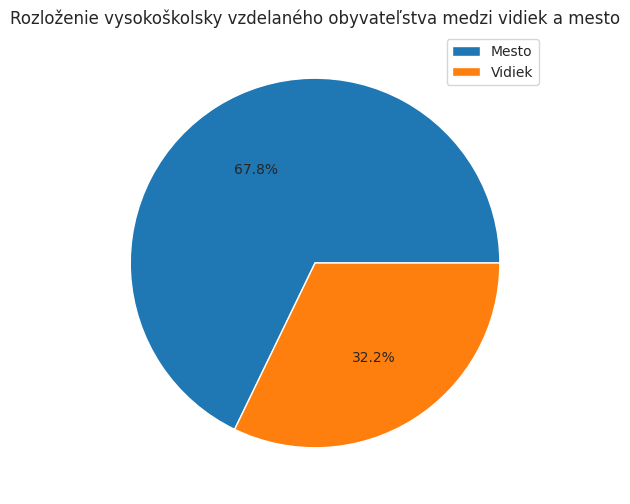

In [ ]:
s_univerzitou =  vzdelanie_obce.query('Vzdelanie.str.contains("vysoko≈°kolsk√©")')
count_all_vs = s_univerzitou['abs.'].sum()
count_town_vs = s_univerzitou.query('Mesto==1')['abs.'].sum()
vs_mesta_grouped = s_univerzitou.groupby('Mesto')['abs.'].sum()
obce_mesta_grouped = obce_populacie.groupby('Mesto')['Spolu'].sum()
plt.figure(figsize=(6,6))
plt.pie([vs_mesta_grouped[1], vs_mesta_grouped[0]], autopct='%1.1f%%')
plt.title("Rozlo≈æenie vysoko≈°kolsky vzdelan√©ho obyvateƒæstva medzi vidiek a mesto")
plt.legend(["Mesto", "Vidiek"])
plt.savefig('img/obr13.pdf')
plt.show()
pass

Ber√∫c do √∫vahy t√∫ skutoƒçnos≈•, ≈æe v√§ƒç≈°ina *(53.2 %)* obyvateƒæstva SR ≈æije v mest√°ch, je prirodzen√© predpoklada≈• aj koncentr√°ciu vysoko≈°kolsky vzdelanej popul√°cie v mest√°ch. Vo vizualiz√°cii vy≈°≈°ie sme sa presvedƒçili, ≈æe t√°to prevaha miest je naozaj veƒæk√°, nakoƒæko a≈æ 67.8 % vysoko≈°kolsky vzdelanej popul√°cie ≈æije v mest√°ch.

V mape, ktor√° vizualizovala podiel vysoko≈°kolskej popul√°cie v jednotliv√Ωch okresoch SR je evidentn√Ω obrovsk√Ω podiel v dvoch najv√§ƒç≈°√≠ch mest√°ch ‚Äì Bratislave a Ko≈°iciach. Pozrime sa bli≈æ≈°ie aj na to, ak√Ω podiel predstavuj√∫ pr√°ve tieto dve mest√°.

In [ ]:
# Bratislava a Ko≈°ice vykazuj√∫ celkovo 234768 vysoko≈°kolsky vzdelan√Ωch ƒæud√≠
print("BA a KE vykazuj√∫ 234 768 vysoko≈°kolsky vzdelan√Ωch obyvateƒæov")
print(f"ƒåo predstavuje pribli≈æne {round(100*(234768/999439), 2)}% celej vysoko≈°kolsky vzdelanej popul√°cie")

BA a KE vykazuj√∫ 234 768 vysoko≈°kolsky vzdelan√Ωch obyvateƒæov
ƒåo predstavuje pribli≈æne 23.49% celej vysoko≈°kolsky vzdelanej popul√°cie


Mest√° Bratislava a Ko≈°ice, ktor√© vykazuj√∫ 234 768 vysoko≈°kolsky vzdelan√Ωch obyvateƒæov, predstavuj√∫ v glob√°lnom meradle celej vysoko≈°kolsky vzdelanej popul√°cie pribli≈æne 23.49 %.

Zauj√≠mav√Ωm pozorovan√≠m, popri koncentr√°cii vysoko≈°kolsky vzdelan√©ho obyvateƒæstva v mest√°ch, je aj v√°ha krajsk√Ωch miest v glob√°lnom meradle celej vysoko≈°kolsky vzdelanej popul√°cie.

In [ ]:
#mesta = vzdelanie_obce.query("Vzdelanie.str.contains('vysoko≈°kolsk√©')").set_index("N√°zov obce").query('`N√°zov obce`.str.startswith("Ko≈°ice")').iloc[:,6].sum()
university_by_cities = {"BA":173848, "TT":15605, "NR":22916, "TN":14691, "ZA": 22820, "BB": 22039, "PO":22852, "KE":60920}
# Jednotliv√© hodnoty v university_by_cities z√≠skan√© query prechodmi datasetov

print(f"Vysoko≈°kolsky vzdelan√° popul√°cia krajsk√Ωch miest tvor√≠¬†{round(100*(sum(university_by_cities.values())/999439), 2)} % celkovej popul√°cie")

Vysoko≈°kolsky vzdelan√° popul√°cia krajsk√Ωch miest tvor√≠¬†35.59 % celkovej popul√°cie


Vysoko≈°kolsky vzdelan√° popul√°cia Bratislavy a Ko≈°√≠c predstavuje a≈æ 23.44 % celej vysoko≈°kolsky vzdelanej popul√°cie SR.

## Stredo≈°kolsk√©

Maturitn√©

### Podƒæa pohlavia

#### Maturitn√©

In [ ]:
# ƒΩudia s maturitou (stredn√° ≈°kola aj vysok√°)
s_maturitou = vzdelanie_obce.query('Vzdelanie.str.contains("vysoko≈°kolsk√©|vy≈°≈°ie|√∫pln√©")')
pohlavie_s_maturitou = s_maturitou.groupby('Pohlavie')['abs.'].sum()

# ƒΩudia bez maturity
bez_maturity = vzdelanie_obce[vzdelanie_obce['Vzdelanie'].str.contains("vysoko≈°kolsk√©|vy≈°≈°ie|√∫pln√©") == False]
#display(bez_maturity)
pohlavie_bez_maturity = bez_maturity.groupby('Pohlavie')['abs.'].sum()

vsetci = vzdelanie_obce.groupby('Pohlavie')['abs.'].sum()
assert vsetci['mu≈æ'] == pohlavie_s_maturitou['mu≈æ'] + pohlavie_bez_maturity['mu≈æ']
assert vsetci['≈æena'] == pohlavie_s_maturitou['≈æena'] + pohlavie_bez_maturity['≈æena']

Pohlavie
mu≈æ     1190876
≈æena    1416751
Name: abs., dtype: int64

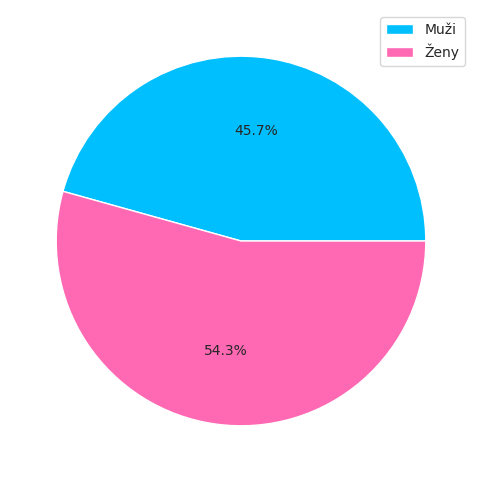

In [ ]:
# Bez maturity mesto/dedina
# S maturitou mesto/dedina
display(s_maturitou.groupby('Pohlavie')['abs.'].sum())
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(s_maturitou.groupby("Pohlavie")["abs."].sum(), autopct='%1.1f%%',colors=["deepskyblue","hotpink"])
#plt.title("Zlo≈æenie stredo≈°kolsky vzdelanej popul√°cie podƒæa pohlavia")
plt.legend(["Mu≈æi", "≈Ωeny"])
plt.savefig('img/obr17.pdf')
plt.show()
pass

Ako aj pri ≈°truktre vysoko≈°kolsky vzdelan√©ho obyvateƒæstva, aj pri popul√°cii so zlo≈æenou ≈°t√°tnou maturitnou sk√∫≈°kou, maj√∫ prevahu op√§≈• ≈æeny, ktor√© tvoria a≈æ 54.3 % popul√°cie SR s maturitnou sk√∫≈°kou, zatiaƒæ ƒço mu≈æi tvoria 45.7 %.

#### Percentu√°lne zast√∫penie vzdelania podƒæa pohlavia

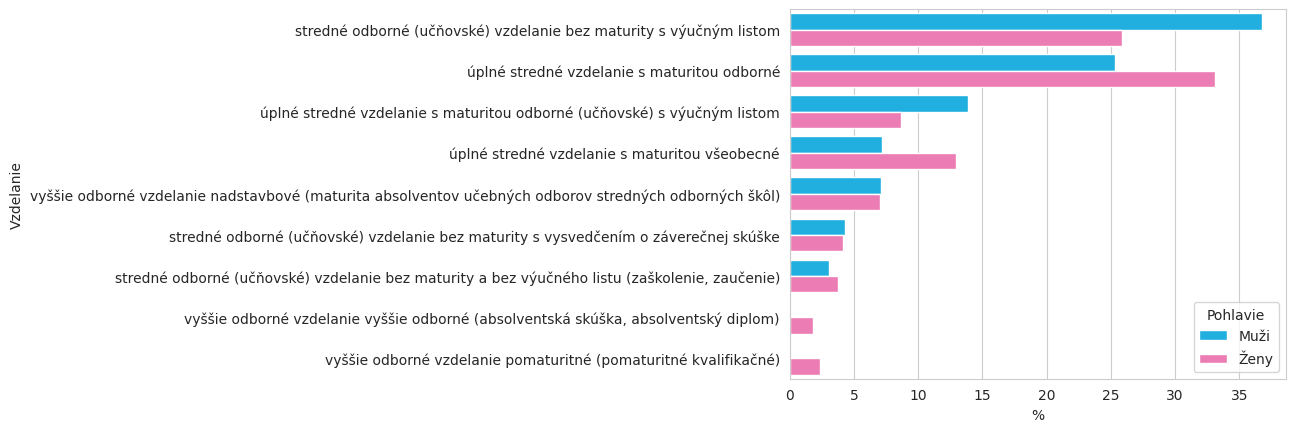

In [ ]:
muzi_stredne = vzdelanie_obce.query('Pohlavie == "mu≈æ" and "predprodukt√≠vny vek (0-14 rokov)" not in `Ekonomick√© vekov√© skupiny` and Vzdelanie.str.contains("stredn√©|vy≈°≈°ie")')
muzi_stredne_vzdelanie = muzi_stredne.groupby('Vzdelanie')['abs.'].sum().apply(lambda x: x / muzi_stredne['abs.'].sum() * 100).sort_values(ascending=False)

zeny_stredne = vzdelanie_obce.query('Pohlavie == "≈æena" and "predprodukt√≠vny vek (0-14 rokov)" not in `Ekonomick√© vekov√© skupiny` and Vzdelanie.str.contains("stredn√©|vy≈°≈°ie")')
zeny_stredne_vzdelanie = zeny_stredne.groupby('Vzdelanie')['abs.'].sum().apply(lambda x: x / zeny_stredne['abs.'].sum() * 100).sort_values()

table = zeny_stredne_vzdelanie.to_frame().reset_index().rename(columns={'abs.': '≈Ωeny'})
table2 = muzi_stredne_vzdelanie.to_frame().reset_index().rename(columns={'abs.': 'Mu≈æi'})
new = table2.merge(table)
new = pd.melt(new, id_vars='Vzdelanie', var_name='Pohlavie').query('value>1')
plot = sns.barplot(data=new, x='value', y='Vzdelanie', hue='Pohlavie', palette={"≈Ωeny":"hotpink","Mu≈æi":"deepskyblue"})
plot.set(xlabel='%')
plt.savefig('img/obr20.pdf')
plt.show()
pass

#### Stredo≈°kolsk√© - aj bez maturity



Pohlavie
mu≈æ     1798338
≈æena    1852785
Name: abs., dtype: int64

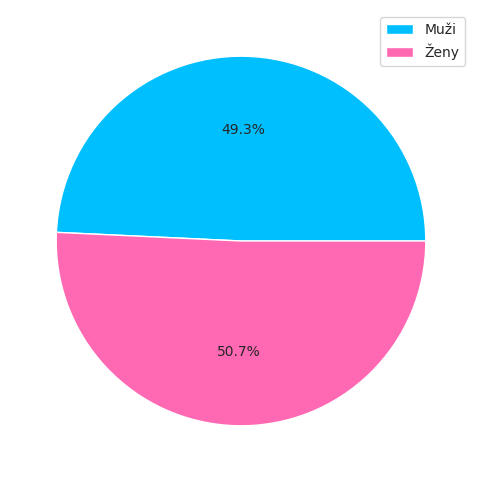

In [ ]:
stredoskolske_vzd = vzdelanie_obce.query('Vzdelanie.str.contains("vysoko≈°kolsk√©|vy≈°≈°ie|√∫pln√©|stredn√©")')
zeny_strd = stredoskolske_vzd.groupby('Pohlavie')['abs.'].sum()['≈æena']
muzi_strd = stredoskolske_vzd.groupby('Pohlavie')['abs.'].sum()['mu≈æ']
display(stredoskolske_vzd.groupby('Pohlavie')['abs.'].sum())
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(stredoskolske_vzd.groupby("Pohlavie")["abs."].sum(), autopct='%1.1f%%',colors=["deepskyblue","hotpink"])
plt.legend(["Mu≈æi", "≈Ωeny"])
#plt.title("Rozlo≈æenie obyvateƒæstva s aspo≈à stredo≈°kolsk√Ωm vzdelan√≠m podƒæa pohlavia ")
plt.savefig('img/obr15.pdf')
plt.show()
pass

##### Iba stredo≈°kolsk√©

Pohlavie
mu≈æ     1364945
≈æena    1286739
Name: abs., dtype: int64

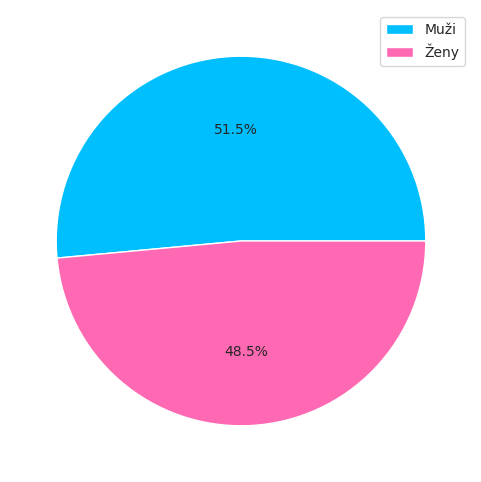

In [ ]:
stredoskolske_vzd2 = vzdelanie_obce.query('Vzdelanie.str.contains("vy≈°≈°ie|√∫pln√©|stredn√©")')
zeny_strd2 = stredoskolske_vzd2.groupby('Pohlavie')['abs.'].sum()['≈æena']
muzi_strd2 = stredoskolske_vzd2.groupby('Pohlavie')['abs.'].sum()['mu≈æ']
display(stredoskolske_vzd2.groupby('Pohlavie')['abs.'].sum())
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(stredoskolske_vzd2.groupby("Pohlavie")["abs."].sum(), autopct='%1.1f%%',colors=["deepskyblue","hotpink"])
plt.legend(["Mu≈æi", "≈Ωeny"])
#plt.title("Rozlo≈æenie obyvateƒæstva iba stredo≈°kolsk√© podƒæa pohlavia")
plt.savefig('img/obr16.pdf')
plt.show()
pass

### Mesto vs vidiek

#### Maturitn√©

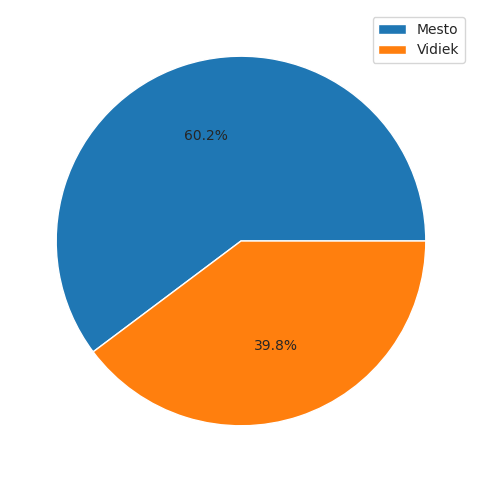

In [ ]:
count_town_ss = s_maturitou.query('Mesto==1')['abs.'].sum()
ss_mesta_grouped = s_maturitou.groupby('Mesto')['abs.'].sum()
obce_mesta_grouped = obce_populacie.groupby('Mesto')['Spolu'].sum()
plt.figure(figsize=(6,6))
plt.pie([ss_mesta_grouped[1], ss_mesta_grouped[0]], autopct='%1.1f%%')
#plt.title("Rozlo≈æenie obyvateƒæstva s maturitnou sk√∫≈°kou medzi vidiek a mesto")
plt.legend(["Mesto", "Vidiek"])
plt.savefig('img/obr22.pdf')
plt.show()

##### Iba maturanti

65020

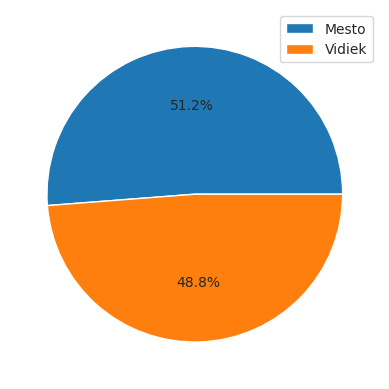

In [ ]:
stredosk_mesta = stredoskolske_vzd2.groupby("Mesto")["abs."].sum()
plt.pie([stredosk_mesta[1],stredosk_mesta[0]], autopct='%1.1f%%')
display(stredosk_mesta[1]-stredosk_mesta[0])
plt.legend(["Mesto","Vidiek"])
#plt.title("Rozlo≈æenie obyvateƒæstva iba stredo≈°kolsk√© medzi mesto a vidiek")
plt.savefig('img/obr23.pdf')
pass

O nieƒço ni≈æ≈°iu koncentr√°ciu popul√°cie, v porovnan√≠ s vysoko≈°kolsky vzdelanou, v mest√°ch pozorujeme pri popul√°cii s maturitnou sk√∫≈°kou. A≈æ 60.2 % obyvateƒæov s maturitou ≈æije v mest√°ch, zatiaƒæ ƒço zhruba 39.8 % na vidieku. T√°to skutoƒçnos≈• dos≈• mo≈æno indikuje aj to, ≈æe vidiek pon√∫ka viacej mo≈æn√Ωch pracovn√Ωch pr√≠le≈æitost√≠ pre t√Ωch, ktor√≠ maj√∫ najvy≈°≈°ie stredn√© vzdelanie s maturitou, ako pon√∫ka v porovnan√≠ s mestiami pre vysoko≈°kolsky vzdelan√Ωch.

#### Aj bez maturity

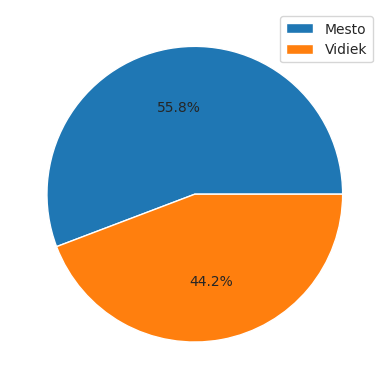

In [ ]:
str_mesto = stredoskolske_vzd.groupby("Mesto")["abs."].sum()
plt.pie([str_mesto[1],str_mesto[0]], autopct='%1.1f%%')
plt.legend(["Mesto","Vidiek"])
plt.savefig('img/obr21.pdf')
pass

##### Iba stredo≈°kolsk√© vzdelanie


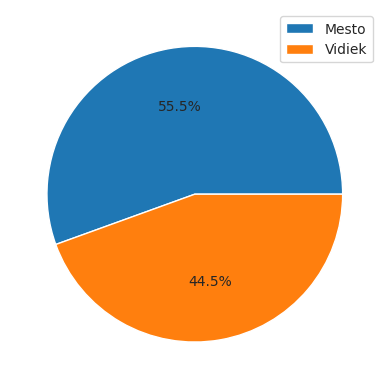

In [ ]:

iba_maturita = vzdelanie_obce.query("Vzdelanie.str.contains('√∫pln√©|vy≈°≈°ie')")
iba_mat_mesta = iba_maturita.groupby("Mesto")["abs."].sum()
plt.pie([iba_mat_mesta[1],iba_mat_mesta[0]], autopct='%1.1f%%')
plt.legend(["Mesto","Vidiek"])
plt.show()
pass

### Mapa

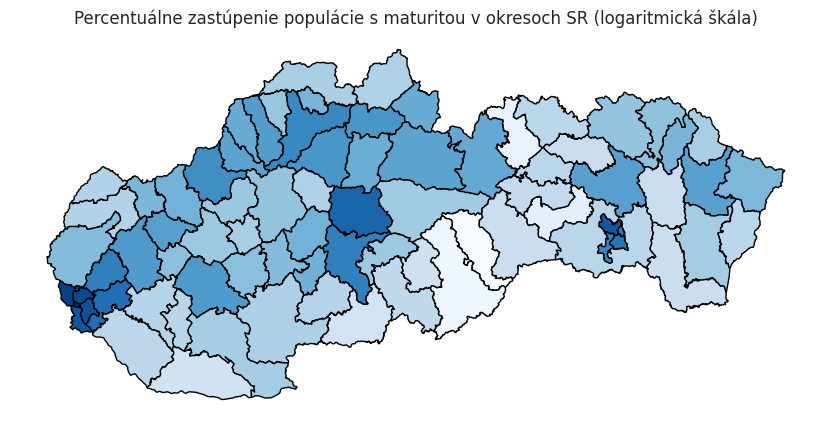

In [ ]:
stredna_skola = vzdelanie_okresy_pohlavie.query('Vzdelanie.str.contains("vysoko≈°kolsk√©|vy≈°≈°ie|√∫pln√©")')
stredna_skola = stredna_skola.set_index(["N√°zov okresu", "Pohlavie"])
#Poƒçty/Podiely stredo≈°kolsky vzdelan√Ωch (ak√Ωkoƒævek stupe≈à a vy≈°≈°√≠ stupe≈à) podƒæa okresov
pocty = stredna_skola.groupby("N√°zov okresu")["abs."].sum()
percenta_stredoskolakov1 = round(100*pocty/vsetci, 3)
percenta_stredoskolakov2 = round(100*pocty/nad_15, 3)

#Poƒçty vysoko≈°kolsky vzdelan√Ωch (ak√Ωkoƒævek stupe≈à) podƒæa pohlavia

#districts_university["maturita1"] = np.log(percenta_stredoskolakov1).to_list()
#districts_university["maturita2"] = np.log(percenta_stredoskolakov2).to_list()
#'''
#ma1 = districts_university.plot(column="maturita1", cmap='Blues',
#                                figsize=(11,5), edgecolor="black")
#'''
#ma2 = districts_university.plot(column="maturita2", cmap='Blues',
#                                figsize=(11,5), edgecolor="black")
#plt.axis("off")
#plt.title("Percentu√°lne zast√∫penie popul√°cie s maturitou v okresoch SR (logaritmick√° ≈°k√°la)")

title = "Percentu√°lne zast√∫penie popul√°cie s maturitou v okresoch SR (logaritmick√° ≈°k√°la)"
map_plot(percenta_stredoskolakov2, title=title, log=True)
plt.savefig('img/obr26.pdf')
pass

Nerovnosti v podiele obyvateƒæstva s maturitnou sk√∫≈°kou v jednotliv√Ωch okresoch SR s√∫ veƒæmi podobn√© t√Ωm, ktor√© predstavuj√∫ podiely vysoko≈°kolsky vzdelan√Ωch. Op√§tovne m√¥≈æeme pozorova≈• extr√©my v krajsk√Ωch mest√°ch, pr√≠padne v aglomer√°cii Bratislavy *(okresy Pezinok a Senec)* alebo niektor√© dobre rozvinut√© okresy ako napr. Zvolen alebo Pie≈°≈•any. Opaƒçn√Ωm extr√©mom s√∫ op√§≈• okresy v hladov√Ωch dolin√°ch ‚Äì Ke≈æmarok, Rimavsk√° Sobota alebo Rev√∫ca.

ƒåo stoj√≠ sa spomenutie je komparat√≠vne lep≈°ia situ√°cia v hladovej doline okres Polt√°r, kde je tento podiel komparat√≠vne o nieƒço lep≈°√≠, ako v in√Ωch regi√≥noch s podobnou mierou nezamestnanosti.

###Podiely v samospr√°vnych krajoch

In [ ]:
stredna_skola_kraje = vzdelanie_kraje_pohlavie.query('Vzdelanie.str.contains("vysoko≈°kolsk√©|vy≈°≈°ie|√∫pln√©")')
pocty_kraje_maturita = stredna_skola_kraje.groupby("N√°zov kraja")["abs."].sum()

zeny_stredna_kraje = stredna_skola_kraje.query("Pohlavie == 'mu≈æ'")
muzi_stredna_kraje = stredna_skola_kraje.query("Pohlavie == '≈æena'")

pocty_kraje_maturita_zeny = zeny_stredna_kraje.groupby("N√°zov kraja")["abs."].sum()
pocty_kraje_maturita_muzi = muzi_stredna_kraje.groupby("N√°zov kraja")["abs."].sum()

percenta_stredoskolakov_kraje1 = round(100*pocty_kraje_maturita/vsetci_kraje, 3)
percenta_stredoskolakov_kraje2 = round(100*pocty_kraje_maturita/nad_15_kraje, 3)
# Bratislava je ako≈æe in√Ω √∫let, ostatn√© s√∫ viac menej veƒæmi podobn√©
kraje_populacie["Percento S≈†1"] = list(percenta_stredoskolakov_kraje1)
kraje_populacie["Percento S≈†2"] = list(percenta_stredoskolakov_kraje2)
#print(percenta_stredoskolakov_kraje1.mean())# -> 47.980625
#print(percenta_stredoskolakov_kraje1.median())# -> 46.0775
kraje_populacie["Podiel"] = np.round(kraje_populacie["Percento V≈†1"] / kraje_populacie["Percento S≈†1"] * 100,2)
# Veƒ∫mi podobn√Ω medi√°n aj aritmetick√Ω priemer

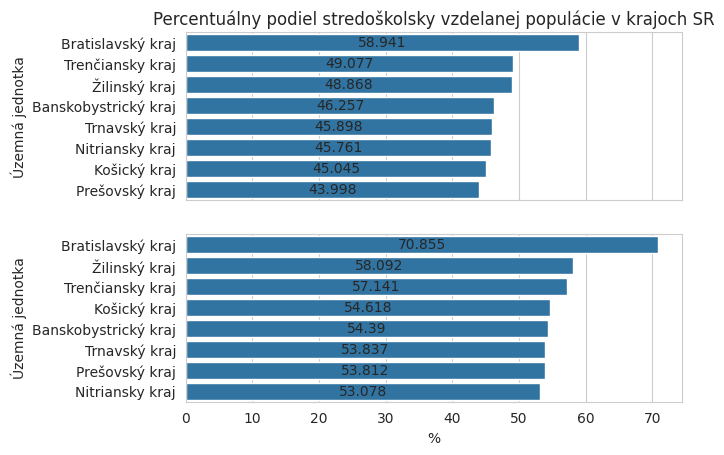

In [ ]:
figure, axes = plt.subplots(2,sharex=True)
plot1 = sns.barplot(data=kraje_populacie.sort_values(by="Percento S≈†1", ascending=False),
                   x="Percento S≈†1", y="√özemn√° jednotka", ax=axes[0])
plot1.set_title("Percentu√°lny podiel stredo≈°kolsky vzdelanej popul√°cie v krajoch SR")
plot1.bar_label(plot1.containers[0], label_type="center")
plot2 = sns.barplot(data=kraje_populacie.sort_values(by="Percento S≈†2", ascending=False),
                   x="Percento S≈†2", y="√özemn√° jednotka", ax=axes[1])
plot2.bar_label(plot2.containers[0], label_type="center")
plot2.set_xlabel("%")
plt.savefig('img/obr24.pdf')
plt.show()
pass

#### Podƒæa pohlavia

N√°zov kraja
Banskobystrick√Ω kraj    3.955237
Bratislavsk√Ω kraj       5.659334
Ko≈°ick√Ω kraj            3.318904
Nitriansky kraj         4.440035
Pre≈°ovsk√Ω kraj          3.140565
Trenƒçiansky kraj        3.910374
Trnavsk√Ω kraj           4.698520
≈Ωilinsk√Ω kraj           4.278693
dtype: float64

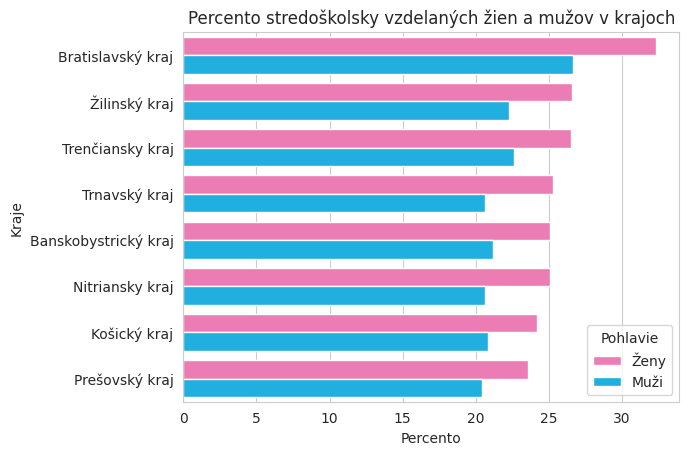

In [ ]:
zeny_maturita = stredna_skola_kraje.query("Pohlavie == '≈æena'").groupby("N√°zov kraja")["abs."].sum()
muzi_maturita = stredna_skola_kraje.query("Pohlavie == 'mu≈æ'").groupby("N√°zov kraja")["abs."].sum()
percenta_zeny_maturita = (100*zeny_maturita / vsetci_kraje)
percenta_muzi_maturita = (100*muzi_maturita / vsetci_kraje)
display((zeny_maturita - muzi_maturita)/vsetci_kraje*100)
data = pd.DataFrame({"Kraje":list(nad_15_kraje.index),"Mu≈æi":list(percenta_muzi_maturita),"≈Ωeny":list(percenta_zeny_maturita)})
zeny_muzi = pd.melt(data,id_vars="Kraje",var_name="Pohlavie")
zeny_muzi.sort_values("value",inplace=True,ascending=False)
zeny_muzi.rename(columns={"value":"Percento"}, inplace=True)
plot = sns.barplot(data=zeny_muzi, y="Kraje",x="Percento", hue="Pohlavie",palette={"≈Ωeny":"hotpink","Mu≈æi":"deepskyblue"})
plot.set_title("Percento stredo≈°kolsky vzdelan√Ωch ≈æien a mu≈æov v krajoch")
plt.savefig('img/obr25.pdf')
plt.show()
pass

## Percento ƒæud√≠ id√∫ci ƒèalej ≈°tudova≈•

### Podƒæa krajov

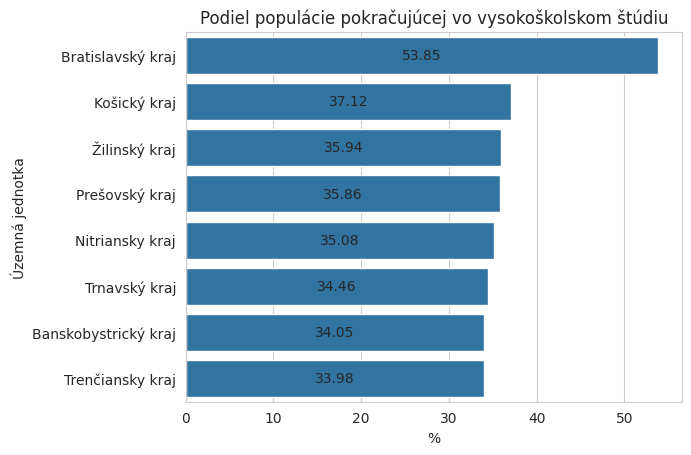

In [ ]:
plot1 = sns.barplot(data=kraje_populacie.sort_values(by="Podiel", ascending=False), x="Podiel", y="√özemn√° jednotka")
plot1.set_xlabel("%")
plot1.bar_label(plot1.containers[0], label_type="center")
plot1.set_title("Podiel popul√°cie pokraƒçuj√∫cej vo vysoko≈°kolskom ≈°t√∫diu")
plt.savefig('img/obr27.pdf')
plt.show()
pass

### Podƒæa okresov

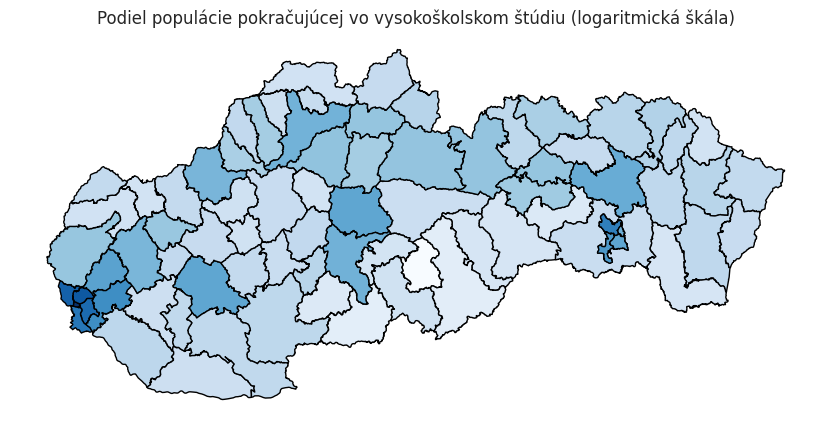

In [ ]:
title = "Podiel popul√°cie pokraƒçuj√∫cej vo vysoko≈°kolskom ≈°t√∫diu (logaritmick√° ≈°k√°la)"
map_plot(percenta_vysokoskolakov2/percenta_stredoskolakov2, title=title , log=True)
plt.savefig('img/obr28.pdf')
pass

### Z√°pad, stred a v√Ωchod

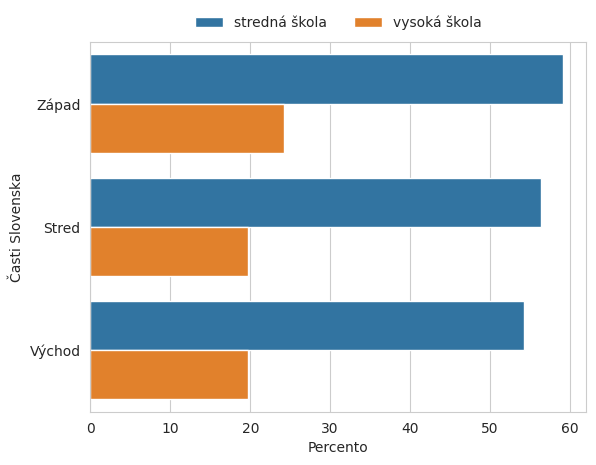

In [ ]:
tri_casti = {
    "Z√°pad":["Bratislavsk√Ω kraj","Trnavsk√Ω kraj","Trenƒçiansky kraj","Nitriansky kraj"],
    "Stred":["Banskobystrick√Ω kraj","≈Ωilinsk√Ω kraj"],
    "V√Ωchod":["Pre≈°ovsk√Ω kraj","Ko≈°ick√Ω kraj"]
}
data_casti = {"ƒåasti Slovenska":tri_casti.keys()}
for cast, kraje in tri_casti.items():
  obyvatelia = kraje_populacie.loc[kraje,"Nad 15"]
  percentaSS = kraje_populacie.loc[kraje,"Percento S≈†2"]
  percentaVS = kraje_populacie.loc[kraje,"Percento V≈†2"]
  data_casti["stredn√° ≈°kola"] = data_casti.get("stredn√° ≈°kola",[])
  data_casti["vysok√° ≈°kola"] = data_casti.get("vysok√° ≈°kola",[])
  data_casti["stredn√° ≈°kola"].append((obyvatelia * percentaSS).sum() / obyvatelia.sum())
  data_casti["vysok√° ≈°kola"].append((obyvatelia * percentaVS).sum() / obyvatelia.sum())
df = pd.DataFrame(data_casti)
data_casti = pd.melt(df, id_vars="ƒåasti Slovenska", var_name="Typ vzdelania")
data_casti.rename(columns={"value":"Percento"},inplace=True)
plot = sns.barplot(data_casti,x="Percento",y="ƒåasti Slovenska", hue="Typ vzdelania")
sns.move_legend(plot,"lower center",bbox_to_anchor=(.5, 1),ncol=2,title=None, frameon=False)
plt.show()
pass

## Z√°klado≈°kolsk√©

In [ ]:
muzi_zkld = zakladne.query('Pohlavie=="mu≈æ"').groupby('Vek')['abs.'].sum() / men_all['abs.'] * 100
muzi_zkld.rename(index={"90 a viac rokov": '90+'}, inplace=True)

zeny_zkld = zakladne.query('Pohlavie=="≈æena"').groupby('Vek')['abs.'].sum() / women_all['abs.'] * 100
zeny_zkld.rename(index={"90 a viac rokov": '90+'}, inplace=True)

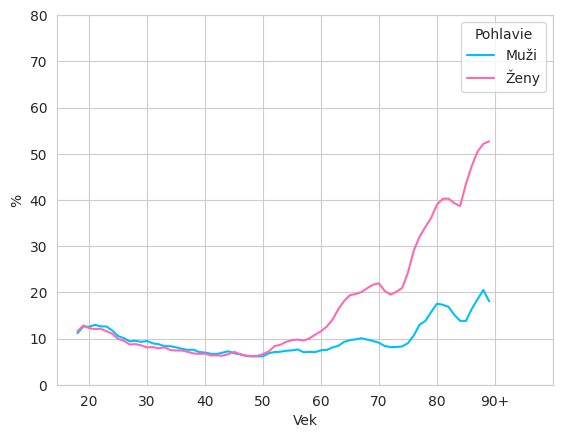

In [ ]:
tab1 = muzi_zkld.to_frame().reset_index().rename(columns={'abs.': 'Mu≈æi'})
tab2 = zeny_zkld.to_frame().reset_index().rename(columns={'abs.': '≈Ωeny'})
tab3 = tab1.merge(tab2)
tab3 = pd.melt(tab3, id_vars='Vek', var_name='Pohlavie')
plot = sns.lineplot(data=tab3, x='Vek', y='value', hue='Pohlavie', palette={"≈Ωeny":"hotpink","Mu≈æi":"deepskyblue"})
plot.set(ylabel='%')
#plot.set(title="Percentu√°lny podiel obyvateƒæstva so z√°kladn√Ωm vzdelan√≠m podƒæa veku a pohlavia")

ax = plt.gca()

ax.set_xticks(range(2, 91, 10))
ax.set_ylim(ymin=0, ymax=80)

plt.setp(ax.get_xticklabels(), rotation=0)
plt.savefig('img/obr19.pdf')
plt.show()
pass

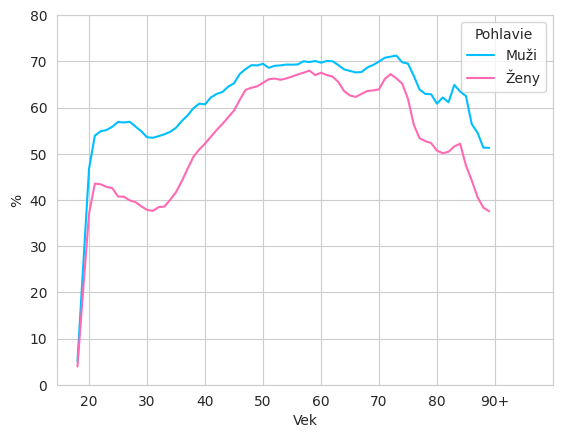

In [ ]:
muzi_str = stredne.query('Pohlavie=="mu≈æ"').groupby('Vek')['abs.'].sum() / men_all['abs.'] * 100
muzi_str.rename(index={"90 a viac rokov": '90+'}, inplace=True)

zeny_str = stredne.query('Pohlavie=="≈æena"').groupby('Vek')['abs.'].sum() / women_all['abs.'] * 100
zeny_str.rename(index={"90 a viac rokov": '90+'}, inplace=True)

tab1 = muzi_str.to_frame().reset_index().rename(columns={'abs.': 'Mu≈æi'})
tab2 = zeny_str.to_frame().reset_index().rename(columns={'abs.': '≈Ωeny'})
tab3 = tab1.merge(tab2)
tab3 = pd.melt(tab3, id_vars='Vek', var_name='Pohlavie')
plot = sns.lineplot(data=tab3, x='Vek', y='value', hue='Pohlavie', palette={"≈Ωeny":"hotpink","Mu≈æi":"deepskyblue"})
plot.set(ylabel='%')

ax = plt.gca()

ax.set_xticks(range(2, 91, 10))
ax.set_ylim(ymin=0, ymax=80)

plt.setp(ax.get_xticklabels(), rotation=0)
plt.savefig('img/obr18.pdf')
plt.show()
pass

## Referencie

[1] https://sita.sk/vskolstve/pocet-studentov-na-slovenskych-vysokych-skolach-vlani-klesol-o-takmer-sedemsto-podiel-zien-bol-59-percent/

[2] Politick√© previerky a ƒçistky. [online]. M√∫zeum obet√≠ komunizmu. [citovan√© d≈àa 7.5.2024]. Dostupn√© na internete: <https://mok.sk/kategorie_obeti/polilticke-previerky/>.